# Supermarket Customer - Data Analysis
## Benazheer Salsabila

# Latar Belakang

Perusahaan sedang menghadapi tantangan untuk meningkatkan akuisisi pelanggan dan merasa perlunya peninjauan kembali agar dapat mencapai hasil yang lebih optimal. Dengan pemahaman yang lebih mendalam terhadap perilaku pelanggan dan pasar, perusahaan berharap dapat mengidentifikasi peluang baru dan mengarahkan upaya penjualan mereka ke arah yang lebih efektif.

# Pernyataan Masalah

Fokus utamanya adalah mengatasi tantangan dan peluang kunci di **customer acquisition, sales, dan channel performance**.

Hal ini melibatkan identifikasi demografi dan preferensi produk dari *customer* untuk *targeted acquisition*, memaksimalkan strategi akusisi *customer*, mengembangkan strategi yang tepat berdasarkan demografi dan perilaku pelanggan, mengungkap peluang *cross-selling* untuk meningkatkan penjualan per pelanggan, dan mengurangi biaya pelayanan dengan mengonversi pelanggan secara efisien ke saluran pembelian yang berbeda.

Dengan memanfaatkan wawasan data dalam bidang ini, perusahaan bertujuan untuk **meningkatkan *revenue* dan *market share***.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data customer supermarket yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK). 

Dataset ini berisi informasi terkait data diri customer, produk yang dibeli selama 2 tahun terakhir, penggunaan kupon diskon, dan tempat pembelian. Ada 4 tabel dan 27 kolom di dalam dataset supermarket customer ini, yaitu:  

### People
* ID: Pengidentifikasi unik pelanggan
* Year_Birth: Tahun kelahiran pelanggan
* Age: Umur pelanggan
* Education: Tingkat pendidikan pelanggan
* Marital_Status: Status pernikahan pelanggan
* Income: Pendapatan tahunan rumah tangga pelanggan
* Income_category: Pendapatan kategori tahunan rumah tangga pelanggan
* Kidhome: Jumlah anak dalam rumah tangga pelanggan
* Teenhome: Jumlah remaja dalam rumah tangga pelanggan
* Childhome: Jumlah anak dan remaja dalam rumah tangga pelanggan
* Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya


### Products
* MntWines: Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir
* MntFruits: Jumlah yang dihabiskan untuk buah dalam 2 tahun terakhir
* MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
* MntFishProducts: Jumlah yang dihabiskan untuk ikan dalam 2 tahun terakhir
* MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
* MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir
* Total_Mnt: Total jumlah yang dihabiskan untuk semua produk dalam 2 tahun terakhir


### Promotion
* NumDealsPurchases: Jumlah pembelian dengan diskon
* AcceptedCmp1: 1 jika pelanggan menerima tawaran dalam kampanye 1, 0 sebaliknya
* AcceptedCmp2: 1 jika pelanggan menerima tawaran dalam kampanye 2, 0 sebaliknya
* AcceptedCmp3: 1 jika pelanggan menerima tawaran dalam kampanye 3, 0 sebaliknya
* AcceptedCmp4: 1 jika pelanggan menerima tawaran dalam kampanye 4, 0 sebaliknya
* AcceptedCmp5: 1 jika pelanggan menerima tawaran dalam kampanye 5, 0 sebaliknya
* Response: 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 sebaliknya
* Total_accept : Total pelanggan menerima tawaran

### Place
* NumWebPurchases: Jumlah pembelian melalui situs web perusahaan
* NumCatalogPurchases: Jumlah pembelian menggunakan katalog
* NumStorePurchases: Jumlah pembelian langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir
* Total_num_purchase : Total jumlah pembelian dari seluruh channel

Berikut 5 baris teratas dan terbawah dari dataset supermarket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import phik
from phik.report import plot_correlation_matrix
from phik import report
import math
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, lognorm, kstest
import matplotlib.pyplot as plt
from matplotlib import lines, patches
from scipy.stats import shapiro, kstest, normaltest
from scipy.special import inv_boxcox
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'capstone2.xlsx')
display(df.head())

Unnamed: 0    ID Year_Birth     Education Marital_Status   Income  \
0           0  5524 1957-01-01      Graduate         Single  58138.0   
1           1  2174 1954-01-01      Graduate         Single  46344.0   
2           2  4141 1965-01-01      Graduate        Married  71613.0   
3           3  6182 1984-01-01      Graduate        Married  26646.0   
4           4  5324 1981-01-01  Postgraduate        Married  58293.0   

   Income_category  Kidhome  Teenhome Dt_Customer  ...  Complain  Response  \
0  3. Upper-Middle        0         0  2012-09-04  ...         0         1   
1  2. Lower-Middle        1         1  2014-03-08  ...         0         0   
2         4. Upper        0         0  2013-08-21  ...         0         0   
3         1. Lower        1         0  2014-02-10  ...         0         0   
4  3. Upper-Middle        1         0  2014-01-19  ...         0         0   

   median_income  Age  Join_year  Childhome  Total_Mnt  Total_num_purchase  \
0        50388.0   58       2012          0       1617                  32   
1        60965.5   61       2014          2         27                  11   
2        59594.0   50       2013          0        776                  25   
3        35196.0   31       2014          1         53                  14   
4        50945.0   34       2014          1        422                  24   

   Total_accept  Order_value  
0             1    50.531250  
1             0     2.454545  
2             0    31.040000  
3             0     3.785714  
4             0    17.583333  

[5 rows x 37 columns]

In [3]:
display(df.describe(), df.describe(include='object'))

Unnamed: 0            ID                     Year_Birth  \
count  2240.000000   2240.000000                           2240   
mean   1119.500000   5592.159821  1968-11-28 12:26:21.428571428   
min       0.000000      0.000000            1940-01-01 00:00:00   
25%     559.750000   2828.250000            1959-01-01 00:00:00   
50%    1119.500000   5458.500000            1970-01-01 00:00:00   
75%    1679.250000   8427.750000            1977-01-01 00:00:00   
max    2239.000000  11191.000000            1996-01-01 00:00:00   
std     646.776623   3246.662198                            NaN   

              Income      Kidhome     Teenhome                    Dt_Customer  \
count    2240.000000  2240.000000  2240.000000                           2240   
mean    51615.139955     0.444196     0.506250  2013-07-10 10:01:42.857142784   
min      1730.000000     0.000000     0.000000            2012-07-30 00:00:00   
25%     35502.500000     0.000000     0.000000            2013-01-16 00:00:00   
50%     51370.000000     0.000000     0.000000            2013-07-08 12:00:00   
75%     68117.250000     1.000000     1.000000            2013-12-30 06:00:00   
max    113734.000000     2.000000     2.000000            2014-06-29 00:00:00   
std     20591.029581     0.538398     0.544538                            NaN   

           Recency     MntWines    MntFruits  ...     Complain     Response  \
count  2240.000000  2240.000000  2240.000000  ...  2240.000000  2240.000000   
mean     49.109375   303.935714    26.302232  ...     0.009375     0.149107   
min       0.000000     0.000000     0.000000  ...     0.000000     0.000000   
25%      24.000000    23.750000     1.000000  ...     0.000000     0.000000   
50%      49.000000   173.500000     8.000000  ...     0.000000     0.000000   
75%      74.000000   504.250000    33.000000  ...     0.000000     0.000000   
max      99.000000  1493.000000   199.000000  ...     1.000000     1.000000   
std      28.962453   336.597393    39.773434  ...     0.096391     0.356274   

       median_income          Age    Join_year    Childhome    Total_Mnt  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    50621.685045    46.090625  2013.028125     0.950446   605.798214   
min      7500.000000    19.000000  2012.000000     0.000000     5.000000   
25%     43526.000000    38.000000  2013.000000     0.000000    68.750000   
50%     52425.500000    45.000000  2013.000000     1.000000   396.000000   
75%     57236.000000    56.000000  2013.000000     1.000000  1045.500000   
max     93027.000000    75.000000  2014.000000     3.000000  2525.000000   
std     11612.313931    11.696638     0.684554     0.751803   602.249288   

       Total_num_purchase  Total_accept  Order_value  
count         2240.000000   2240.000000  2240.000000  
mean            20.178571      0.473661          inf  
min              0.000000      0.000000     0.228571  
25%             14.000000      0.000000     5.000000  
50%             19.000000      0.000000    17.186090  
75%             25.000000      1.000000    39.049654  
max             46.000000      7.000000          inf  
std              7.293275      1.008328          NaN  

[8 rows x 34 columns]

Education Marital_Status  Income_category
count       2240           2240             2240
unique         3              2                4
top     Graduate        Married  2. Lower-Middle
freq        1127           1444              574

## Best Product based on Number of Purchasing Product

Dalam section ini, fokus utama adalah menemukan pola penjualan tertinggi di antara kategori produk, seperti Wine, Meats, Gold, Fish Products, Sweet Products, dan Fruits. Analisis ini akan membantu dalam memahami preferensi konsumen dan memberikan insight bagi strategi pemasaran. Dengan memahami kategori produk yang paling diminati oleh pelanggan, supermarket dapat mengoptimalkan strategi penjualan dan memenuhi kebutuhan konsumen dengan lebih efektif.

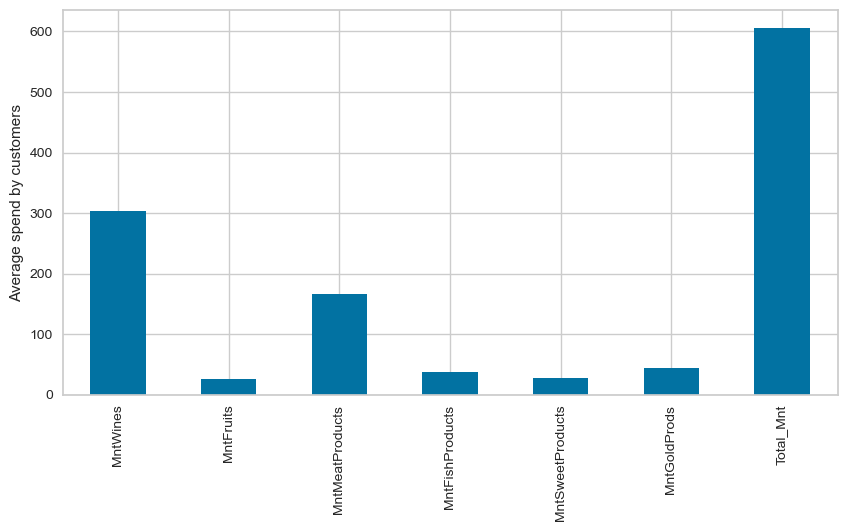

In [4]:
mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending = df[mnt_cols].mean(axis=0)
spending.plot(kind='bar',figsize=(10,5))
plt.ylabel('Average spend by customers')
plt.show()

Dari grafik diatas dapat disimpulkan :

Jenis Produk yang paling banyak dibeli adalah Wine dan yang kedua Meat, dibandingkan dengan penjualan Fruit, Fish, Sweet dan Gold yang jauh dibawah penjualan Wine dan Meat

Hal ini bisa didasarkan beberapa faktor, seperti bagusnya kualitas Wine dan Meat Product yang ditawarkan oleh supermarket, tren lifestyle customer, atau promosi yang efektif. Penjualan wine dan Meat product ini sudah baik dan dapat ditingkatkan kembali melalui Promosi seperti *cross selling* antar Wine dan Meat Product atau Bundling Product.

Penjualan Gold, Fish Products, Sweet Products, dan Fruits mungkin lebih rendah karena masing-masing memiliki pangsa pasar yang lebih spesifik dan mungkin tidak dianggap sebagai produk konsumsi sehari-hari oleh sebagian besar customer. Misalnya, Gold umumnya dianggap sebagai investasi atau barang mewah, sementara Fish, Sweet, dan Fruits mungkin dianggap sebagai produk tambahan atau pilihan makanan ringan. Faktor harga, lifestyle, kurangnya promosi, dan preferensi konsumen juga dapat memainkan peran dalam perbedaan ini

## Customer Segmentation



Dalam usaha untuk mengelompokkan pelanggan, kita perlu merinci informasi demografis mengenai pelanggan itu sendiri. Beberapa variabel demografis yang relevan meliputi pendapatan, total pembelian produk, respons terhadap promosi, jumlah anak, rentang usia, tingkat pendidikan, dan status pernikahan. Pendapatan pelanggan dapat memberikan gambaran tentang daya beli mereka, sementara total pembelian produk mencerminkan tingkat keterlibatan dan kepuasan pelanggan. Respons terhadap promosi dapat membantu dalam merancang strategi pemasaran yang lebih efektif. Informasi mengenai jumlah anak dapat memberikan wawasan tentang kebutuhan dan preferensi keluarga. Rentang usia dan tingkat pendidikan dapat mencerminkan karakteristik demografis yang lebih luas, sementara status pernikahan dapat memengaruhi keputusan pembelian dan preferensi konsumen. Dengan memperhatikan elemen-elemen demografis ini, kita dapat mengembangkan strategi segmentasi pelanggan yang lebih terarah dan sesuai dengan kebutuhan masing-masing kelompok.

#### Age

Age distribution :


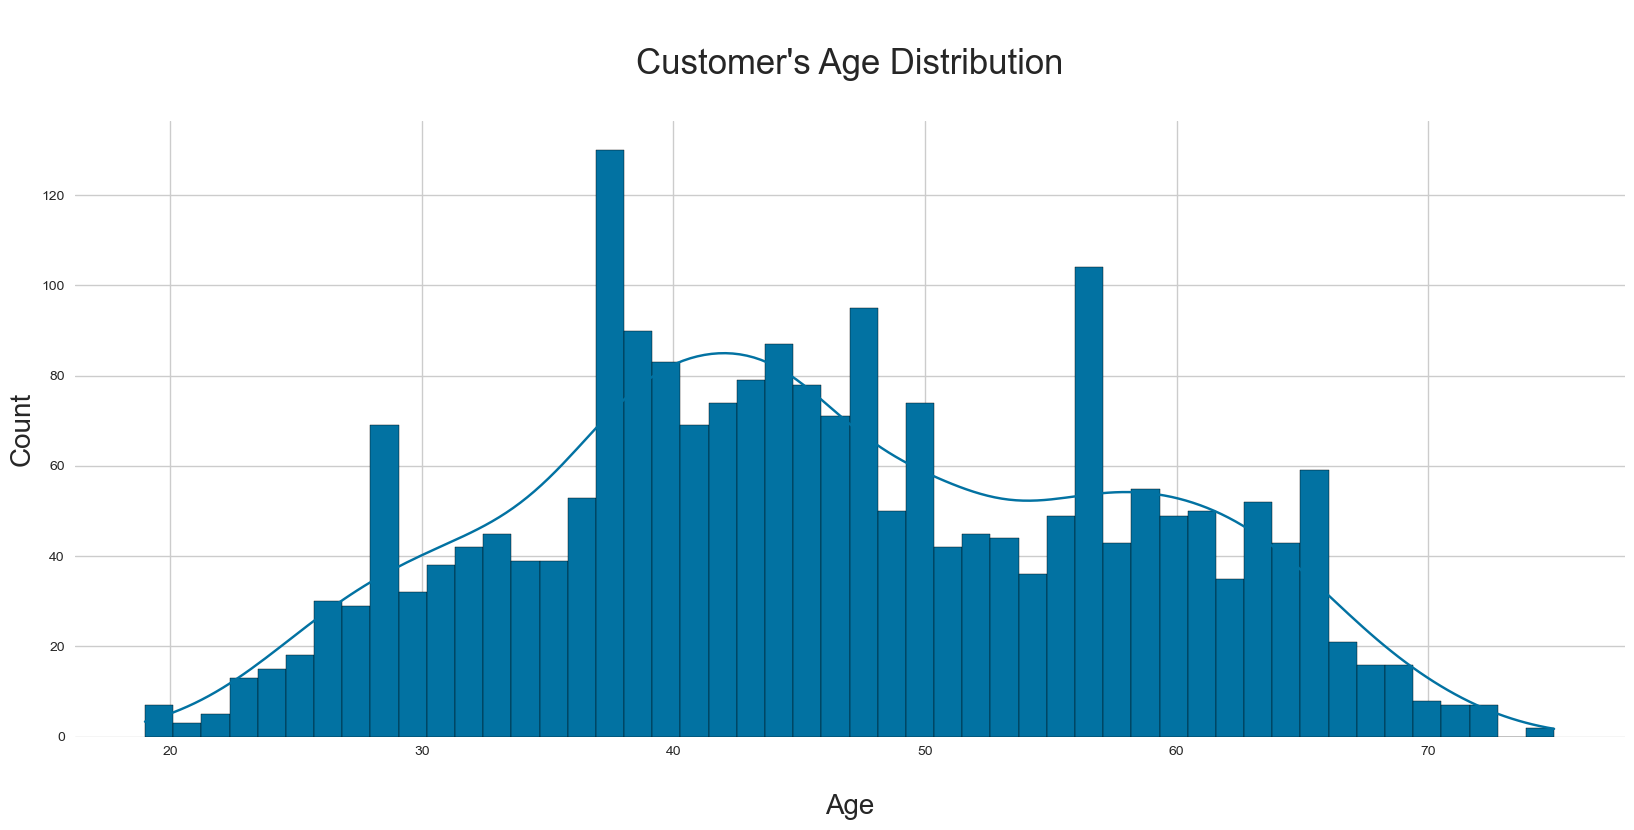

In [57]:
print(f"Age distribution :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df["Age"],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Dari grafik diatas dapat disimpulkan:

* Kita dapat melihat bahwa distribusi usia pelanggan bersifat normal.
* Sebagian besar customer berada dalam rentang usia 36 hingga 50 tahun.

#### Income, Education, and Total Product Purchase

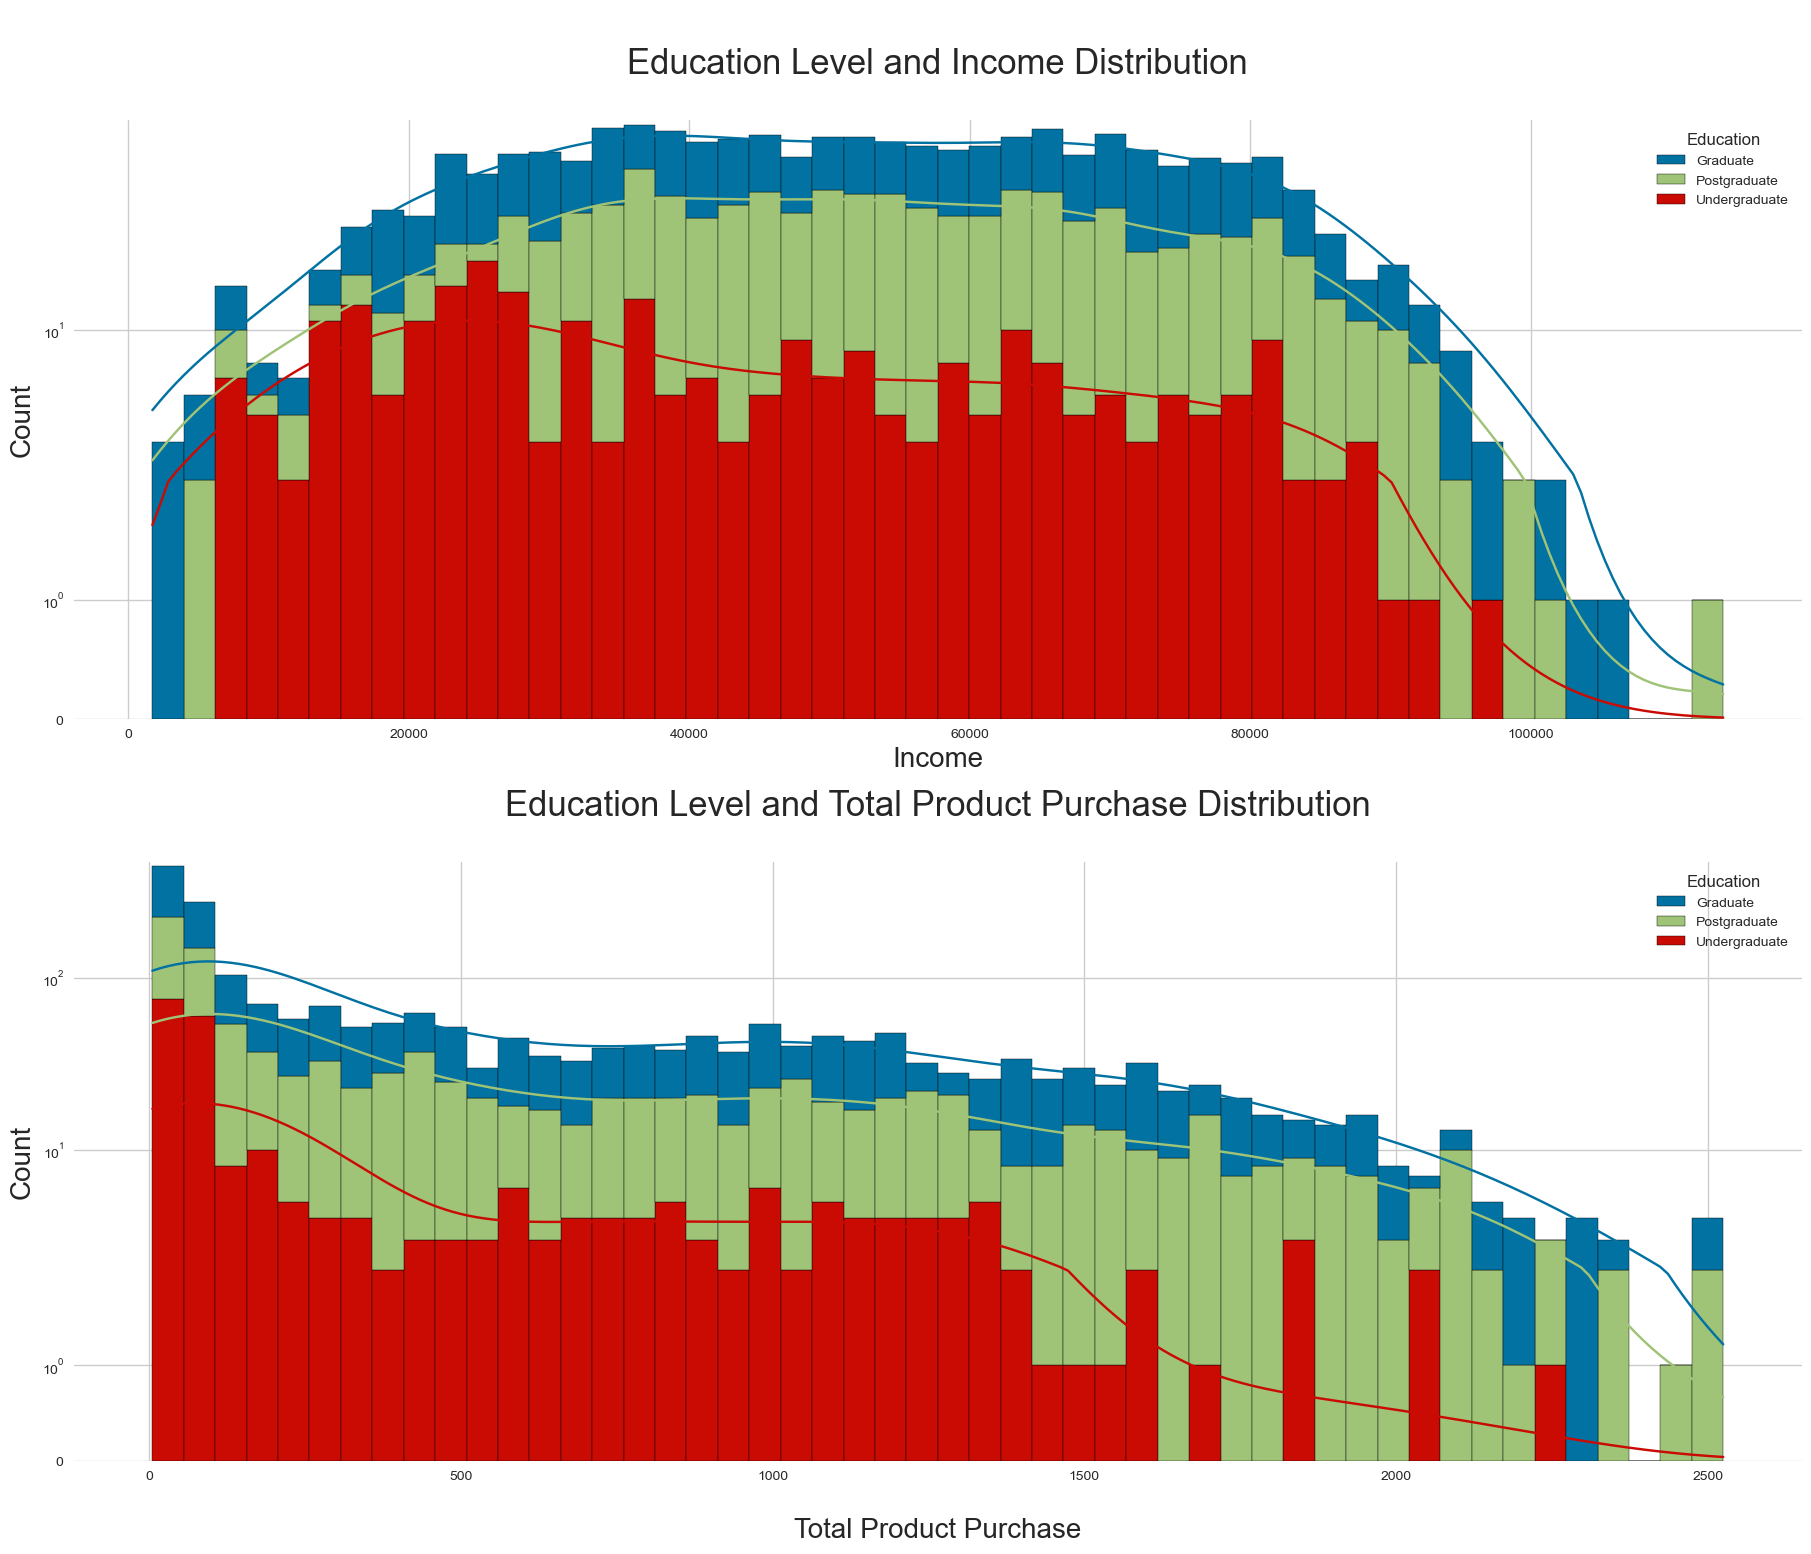

In [5]:
_, axes = plt.subplots(2,1,figsize=(20,16),sharex=False)
plt.tight_layout(pad=7.0)

sns.histplot(data=df,x="Income",hue="Education",multiple="stack",ax=axes[0],kde=True,bins=50,alpha=1,fill=True)

axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level and Income Distribution\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("Income",fontsize=20)


sns.histplot(data=df,x="Total_Mnt",hue="Education",multiple="stack",ax=axes[1],kde=True,bins=50,alpha=1,fill=True)
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level and Total Product Purchase Distribution\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\nTotal Product Purchase",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Dari grafik diatas dapat disimpulkan :
* Graduate memiliki penghasilan terbesar di range 20000 - 85000 dengan total pembelian produk diantara 0 - 2000 produk selama 2 tahun terakhir
* Postgraduate memiliki penghasilan terbesar di range 30000 - 85000 dengan total pembelian produk diantara 0 - 2000 produk selama 2 tahun terakhir
* Undergraduate memiliki penghasilan terbesar di range 10000 - 80000 dengan total pembelian produk diantara 0 - 1400 produk selama 2 tahun terakhir


#### Customer's Child

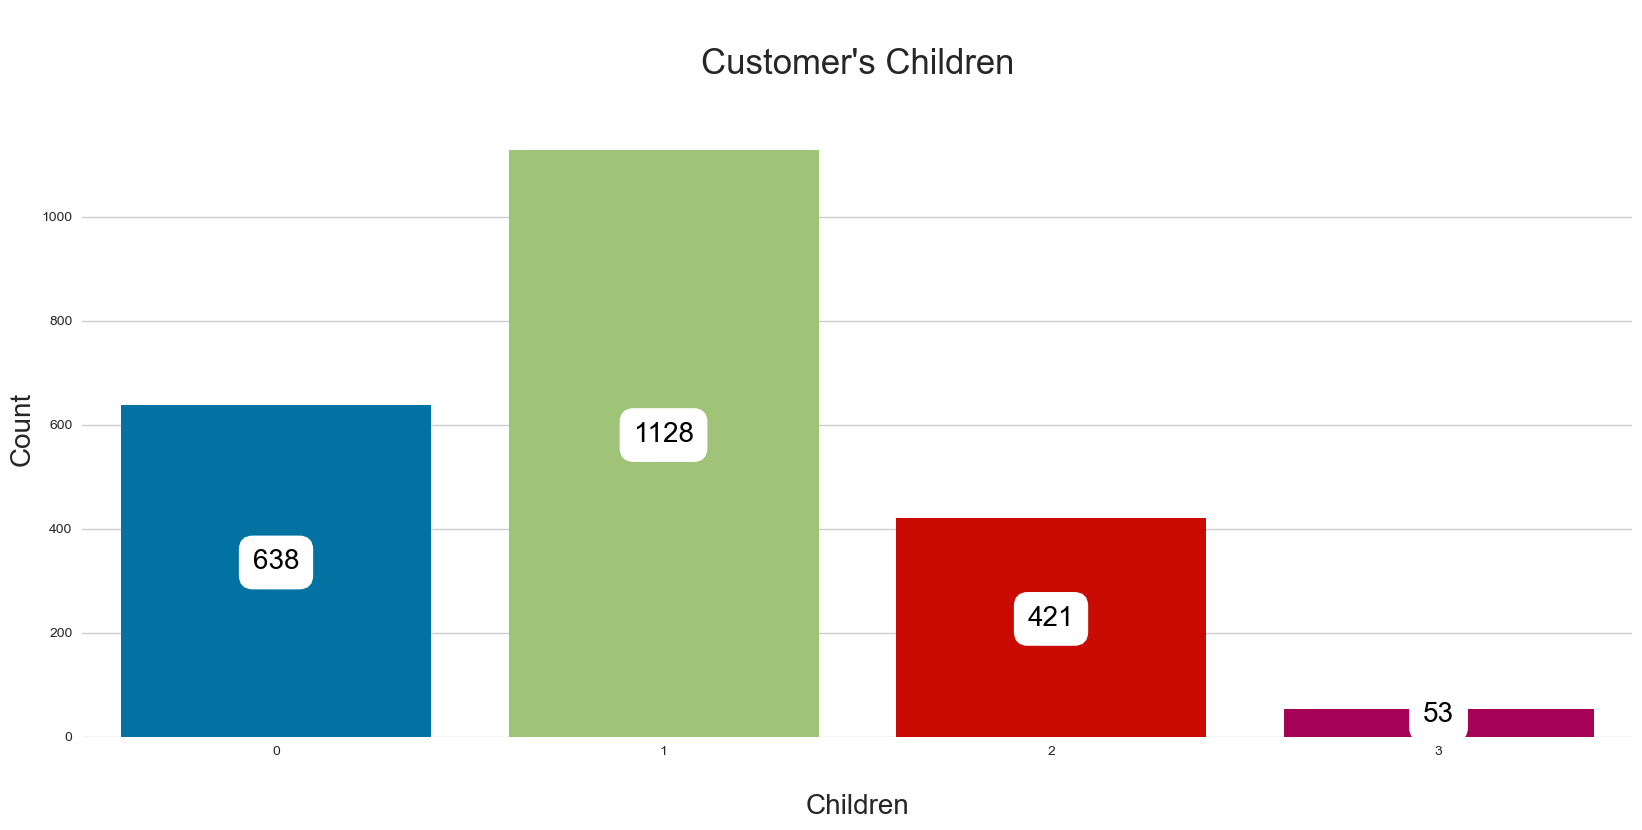

In [6]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Childhome"],saturation=1,linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nChildren",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "white", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Dari grafik diatas dapat disimpulkan :
* Sebagian besar customer memiliki anak 1, yaitu 1128 customer
* 638 customer tidak memiliki anak, 421 customer memiliki anak 2 dan 53 customer memiliki anak 3

#### Correlation Column

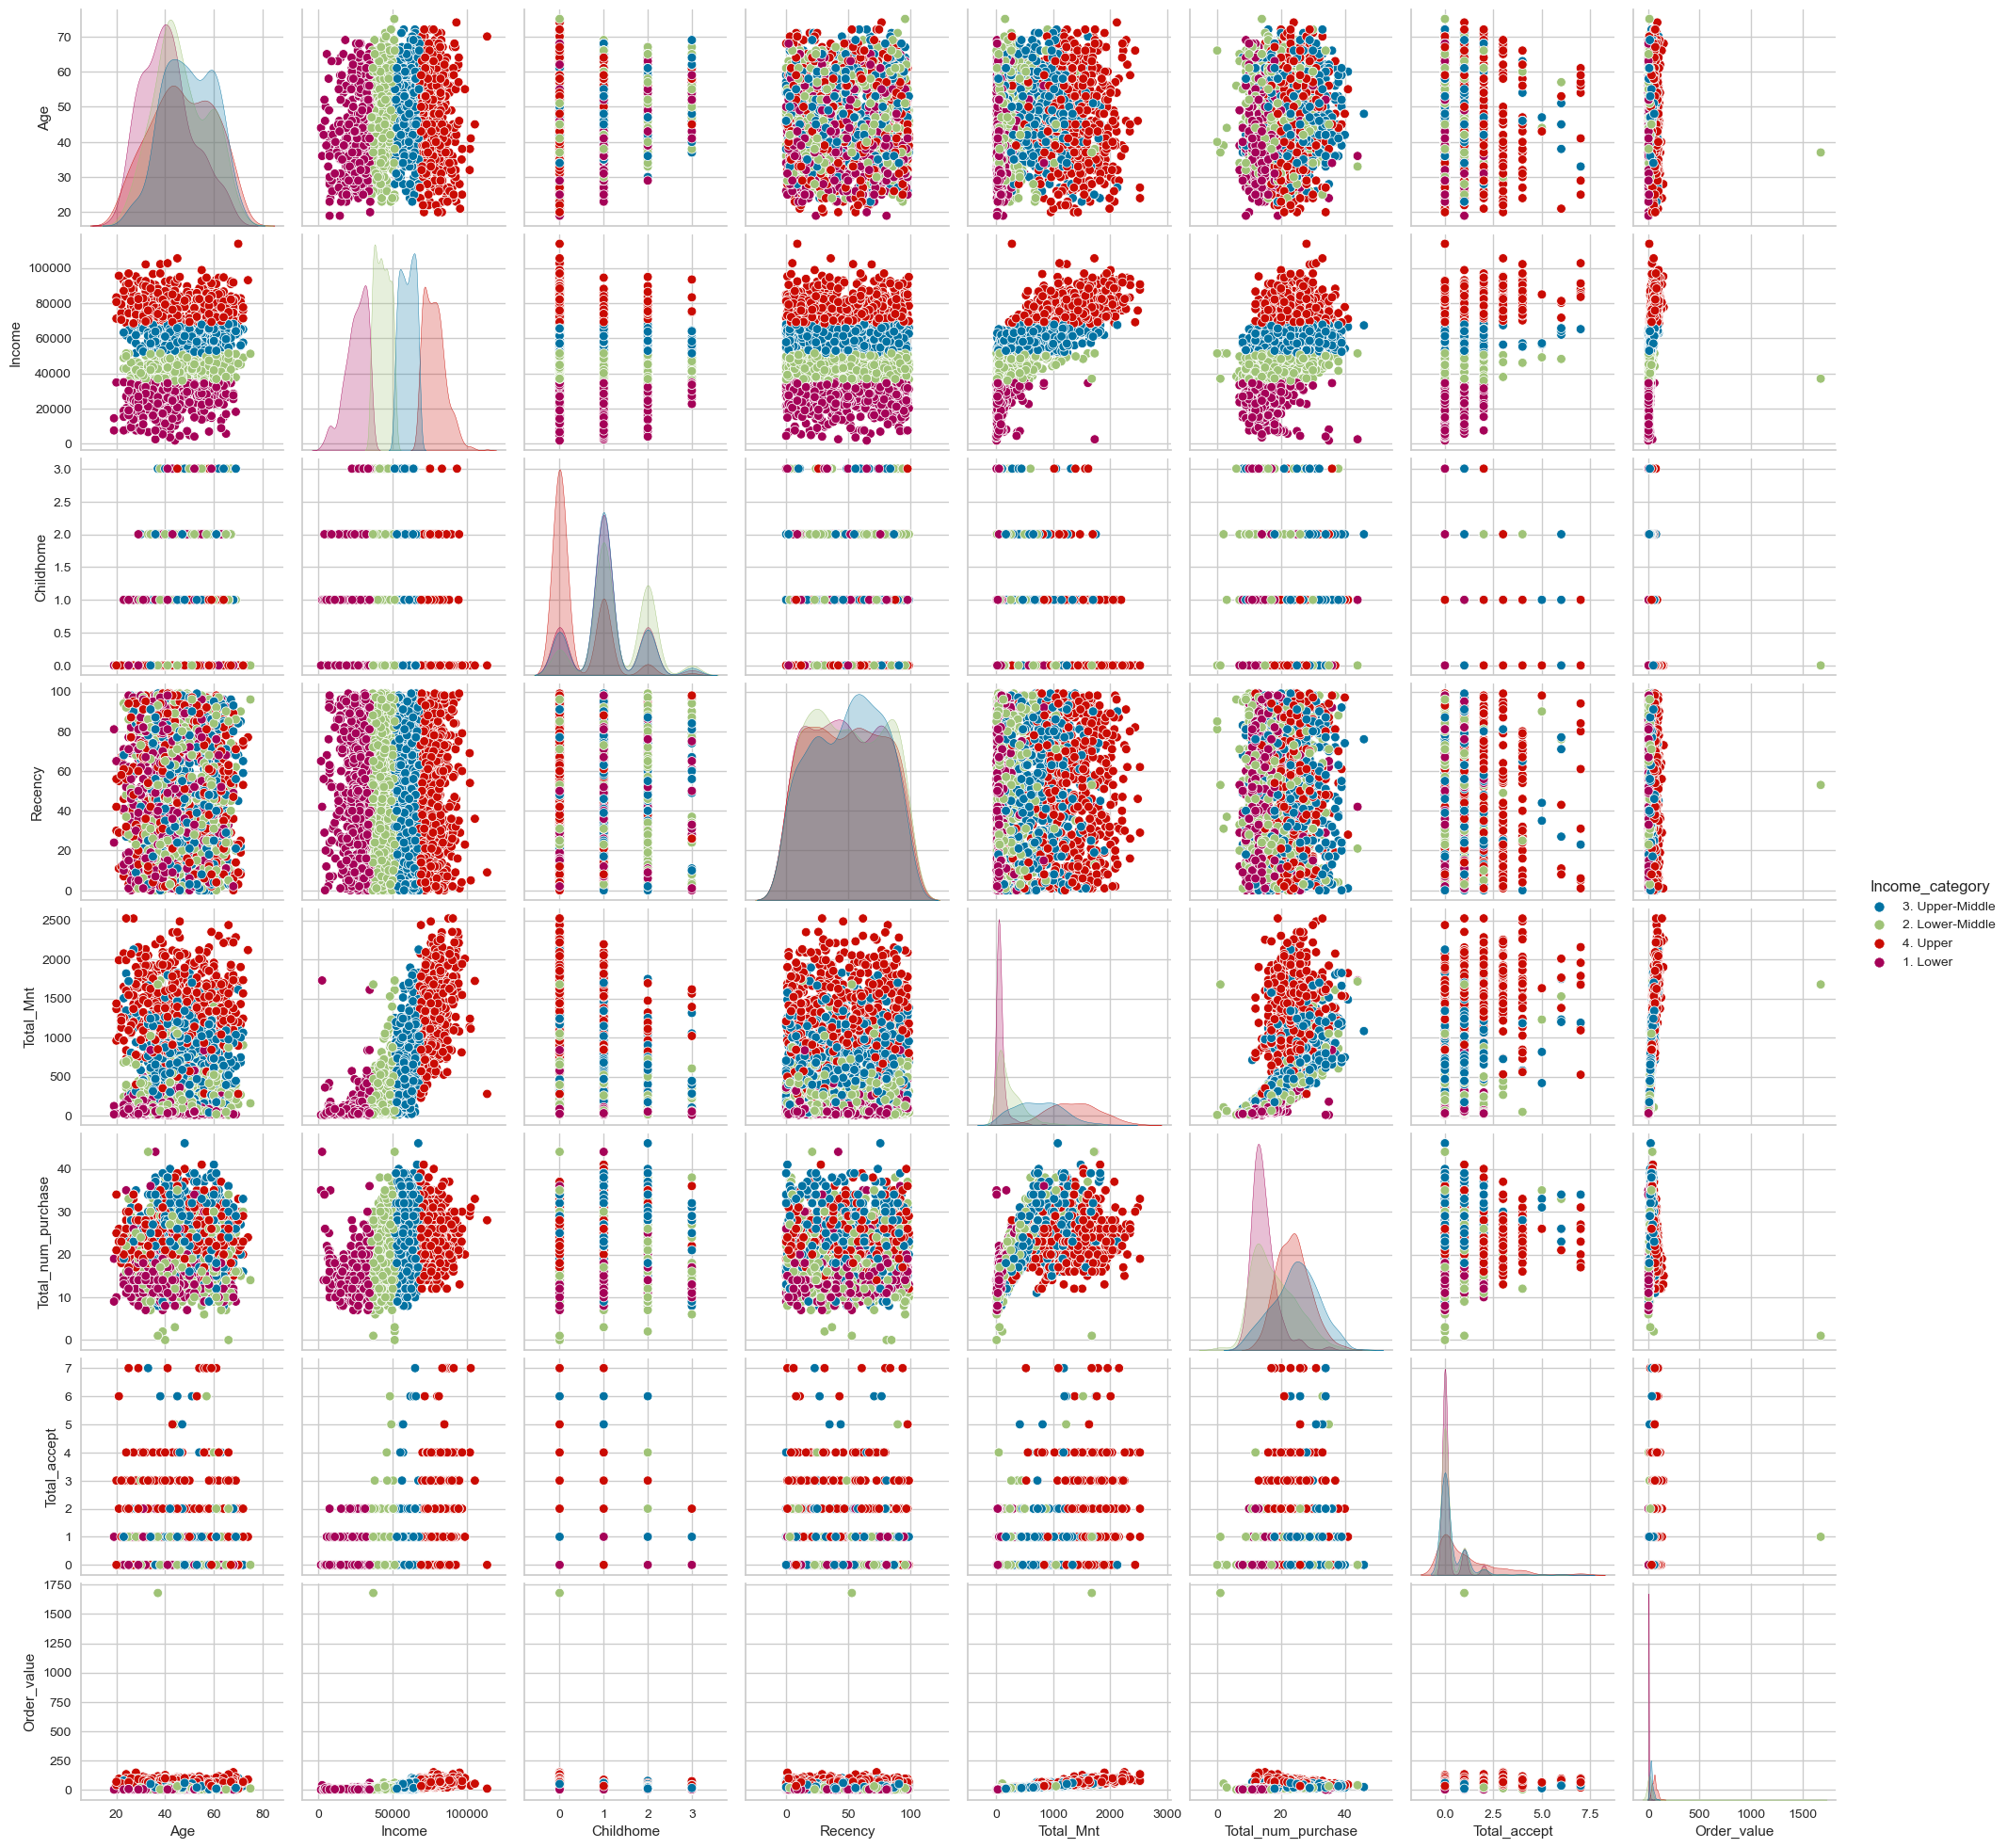

In [7]:
to_plot = ['Age', 'Income', 'Childhome', 'Recency', 'Total_Mnt',
           'Total_num_purchase', 'Total_accept', 'Order_value', 'Income_category']

sns.pairplot(df[to_plot], hue = "Income_category")

plt.show()

Dari grafik diatas dapat disimpulkan :

* Total income dan pembelian produk berbanding lurus, semakin tinggi income semakin banyak jumlah pembeliannya

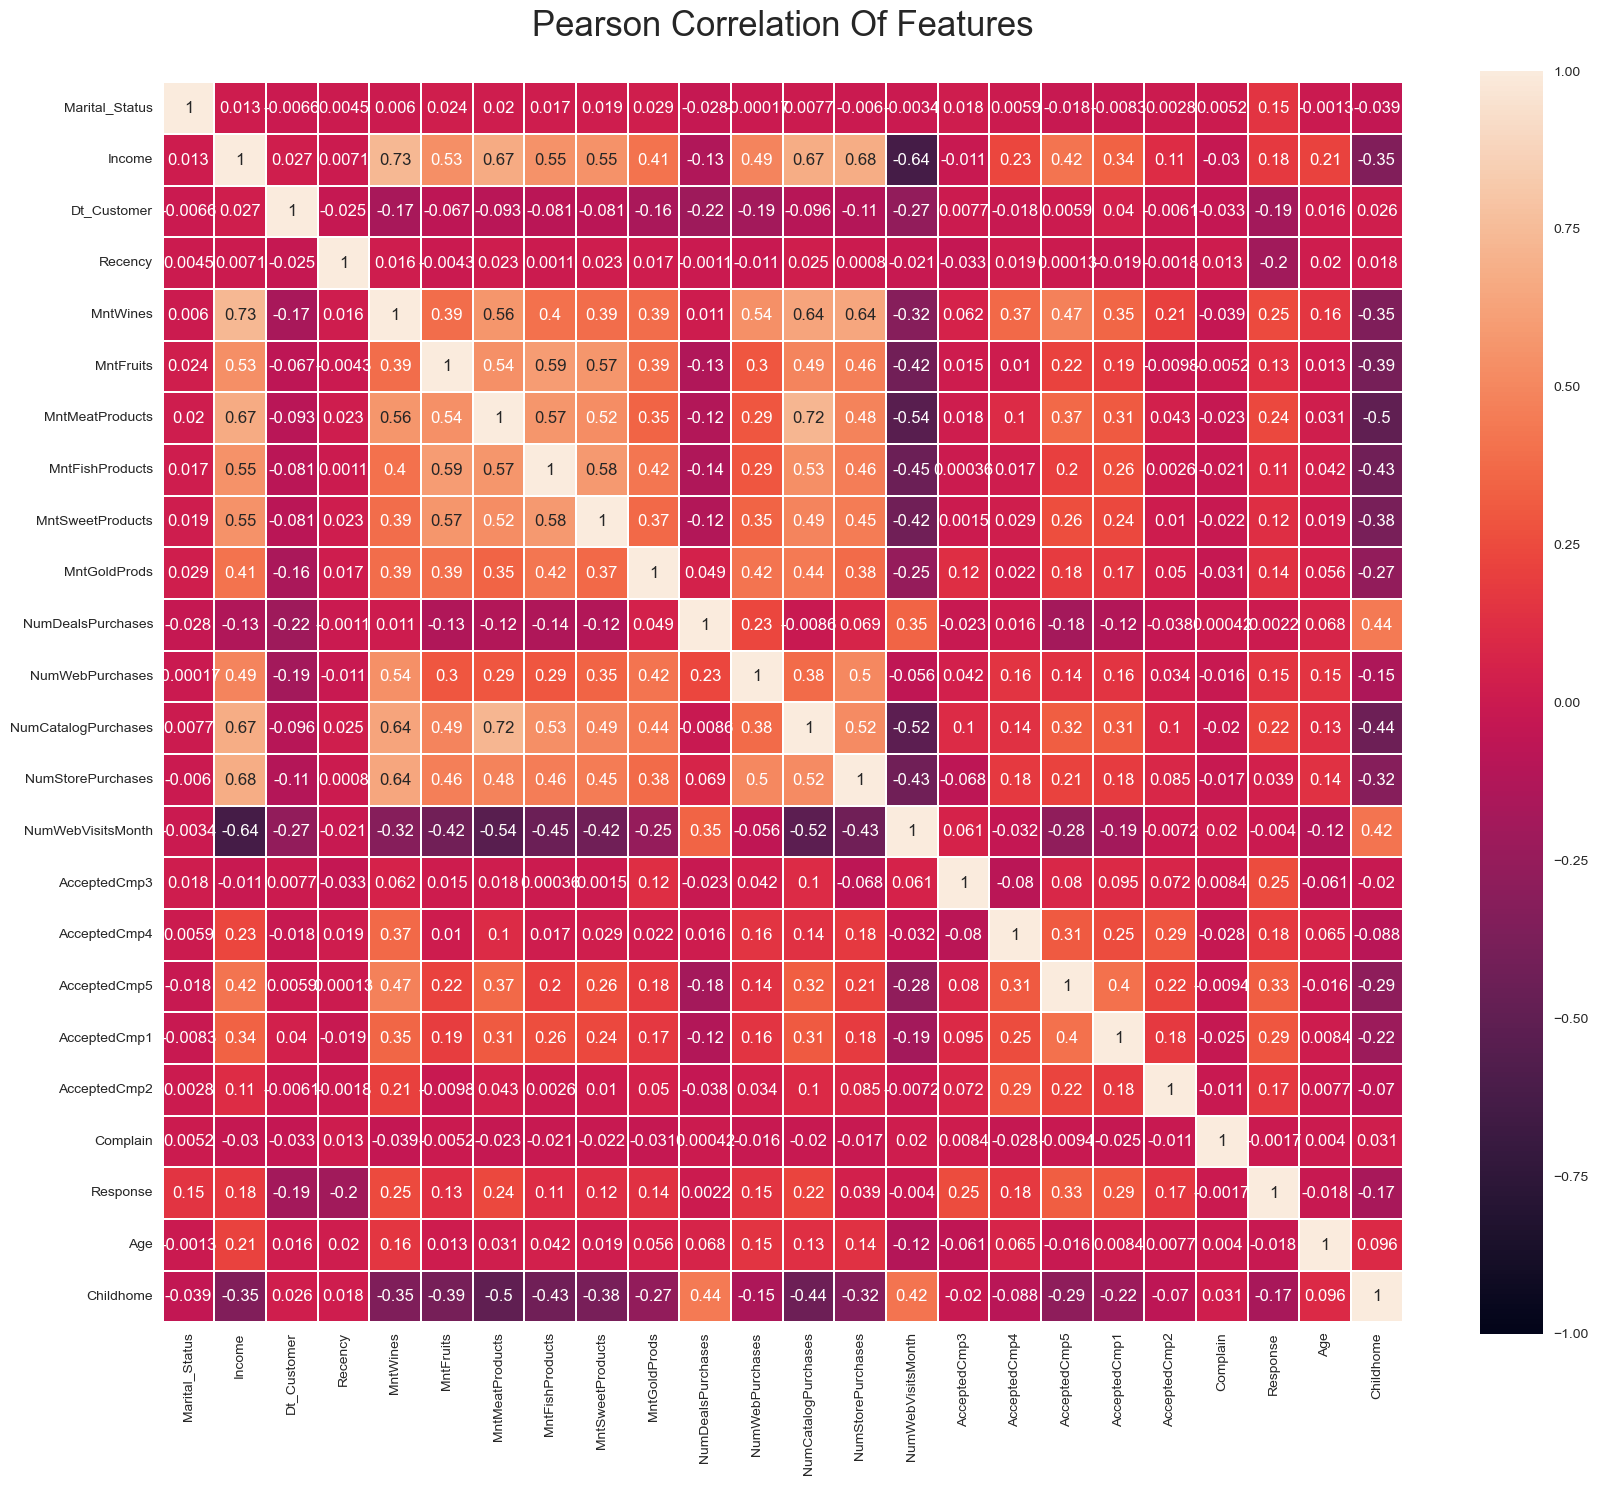

In [8]:
# Assuming 'Marital Status' is the only categorical column
catcol = ["Marital_Status"]

# Using LabelEncoder for categorical encoding
le = LabelEncoder()
for col in catcol:
    df[col] = le.fit_transform(df[col])

plt.subplots(figsize=(20, 20))

# Exclude the 'Education, Income Category, etc' column from the correlation matrix
sns.heatmap(df.drop(columns=["ID", "Education", "Income_category", "Year_Birth", "Kidhome", "Teenhome", "Unnamed: 0", 
                             "median_income", "Total_Mnt", "Total_accept", "Total_num_purchase", "Order_value", "Join_year"]).corr(), square=True,
            cbar_kws=dict(shrink=.82), annot=True, vmin=-1, vmax=1, linewidths=0.1, linecolor='white',
            annot_kws=dict(fontsize=12))

plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()




Dari grafik diatas dapat disimpulkan :

* Terdapat high correlation antara Income dan pembelian wine, pembelian di store dan katalog
* Terdapat High correlation terhdap pembelian Fish dan Fruit

#### Dimensionality Reduction

*Dimensionality Reduction* adalah teknik dalam analisis data yang bertujuan untuk mengurangi jumlah variabel atau fitur dalam suatu dataset. Tujuannya adalah untuk mempertahankan informasi penting sambil mengurangi kompleksitas data. Dengan mengurangi dimensi, kita dapat mengatasi masalah *curse of dimensionality* dan memudahkan interpretasi serta pemrosesan data. Teknik ini sering digunakan untuk meningkatkan kinerja model, mengidentifikasi pola yang signifikan, dan menghemat waktu komputasi.

In [9]:
reference_date = pd.to_datetime('1900-01-01')
# Convert timestamp columns to float
df['Dt_Customer'] = (df['Dt_Customer'] - reference_date).dt.days / 365.25
df['Year_Birth'] = (df['Year_Birth'] - reference_date).dt.days / 365.25

In [10]:
df['Marital_Status'].replace(['Single'], '1', inplace=True)
df['Marital_Status'].replace(['Married'], '2', inplace=True)
df['Education'].replace(['Undergraduate'], '0', inplace=True)
df['Education'].replace(['Graduate'], '1', inplace=True)
df['Education'].replace(['Postgraduate'], '2', inplace=True)
df['Income_category'].replace(['1. Lower'], '1', inplace=True)
df['Income_category'].replace(['2. Lower-Middle'], '2', inplace=True)
df['Income_category'].replace(['3. Upper-Middle'], '3', inplace=True)
df['Income_category'].replace(['4. Upper'], '4', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   float64
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   int32  
 5   Income               2240 non-null   float64
 6   Income_category      2240 non-null   object 
 7   Kidhome              2240 non-null   int64  
 8   Teenhome             2240 non-null   int64  
 9   Dt_Customer          2240 non-null   float64
 10  Recency              2240 non-null   int64  
 11  MntWines             2240 non-null   int64  
 12  MntFruits            2240 non-null   int64  
 13  MntMeatProducts      2240 non-null   int64  
 14  MntFishProducts      2240 non-null   int64  
 15  MntSweetProducts     2240 non-null   i

In [12]:
dataC = df.copy()
columns_to_drop = ['Year_Birth', 'Income', 'Dt_Customer', 'median_income', 'Order_value']  # Add the column names you want to drop

dataC.drop(columns=columns_to_drop, inplace=True)

# StandardScaler
scaler = StandardScaler()
dataC_scaled = scaler.fit_transform(dataC)

# Convert the scaled data back to a DataFrame with column names
scaled_data = pd.DataFrame(dataC_scaled, columns=dataC.columns)
print("Scaled dataset:")
print(scaled_data.head())

Scaled dataset:
   Unnamed: 0        ID  Education  Marital_Status  Income_category   Kidhome  \
0   -1.731278 -0.020999  -0.410013        1.346874         0.452429 -0.825218   
1   -1.729731 -1.053058  -0.410013        1.346874        -0.445216  1.032559   
2   -1.728185 -0.447070  -0.410013       -0.742460         1.350074 -0.825218   
3   -1.726638  0.181716  -0.410013       -0.742460        -1.342860  1.032559   
4   -1.725092 -0.082614   1.123256       -0.742460         0.452429  1.032559   

   Teenhome   Recency  MntWines  MntFruits  ...  AcceptedCmp1  AcceptedCmp2  \
0 -0.929894  0.307039  0.983781   1.551577  ...     -0.262111      -0.11651   
1  0.906934 -0.383664 -0.870479  -0.636301  ...     -0.262111      -0.11651   
2 -0.929894 -0.798086  0.362723   0.570804  ...     -0.262111      -0.11651   
3 -0.929894 -0.798086 -0.870479  -0.560857  ...     -0.262111      -0.11651   
4 -0.929894  1.550305 -0.389085   0.419916  ...     -0.262111      -0.11651   

   Complain  Response 

In [13]:
scaled_dataC = scaled_data.copy()
pca = PCA(n_components = 3,random_state = 42)
scaled_dataC = pca.fit_transform(scaled_dataC)
pca_data = pd.DataFrame(scaled_dataC, columns=["col1","col2", "col3"])

print("PCA transformed dataset :")
pca_data.head(15).T

PCA transformed dataset :


0         1         2         3         4         5         6   \
col1  4.673669 -3.170706  1.971224 -2.976924 -0.450111  0.841441  0.761842   
col2  0.471940 -0.199051  0.050631 -1.531810  0.429434  1.707818  1.805740   
col3 -0.328452 -0.067333 -1.631507 -0.323183 -0.743064 -0.509083 -0.679794   

            7         8         9         10        11        12        13  \
col1 -2.568314 -2.699596 -4.182821 -3.122328 -2.300857  2.802795 -1.586624   
col2 -0.524525 -1.376871  0.983254 -1.744506 -1.605405 -1.511481  1.907270   
col3  0.144919  1.754713  2.739542 -0.120565 -0.601448 -2.955703  0.270708   

            14  
col1 -2.490614  
col2 -1.846988  
col3 -0.414160

In [14]:
x = pca_data["col1"]
y = pca_data["col2"]
z = pca_data["col3"]

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, opacity=0.8))])
fig.update_layout(title=dict(text= "Dataset After Dimesionality Reduction[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Setelah Dimensionaly Reduction, kita dapat melakukan pengelompokan Customer

#### Customer Clustering

Dengan menempatkan pelanggan ke dalam kelompok-kelompok yang serupa berdasarkan karakteristik yang diidentifikasi selama *dimensionaly reduction*, kita dapat memahami pola-pola yang mungkin ada di antara kelompok-kelompok tersebut. Ini membantu dalam merancang strategi pemasaran yang lebih terarah, mempersonalisasi pengalaman pelanggan, dan meningkatkan pemahaman tentang segmen pelanggan yang berbeda. 

Elbow Method untuk menentukan jumlah cluster:


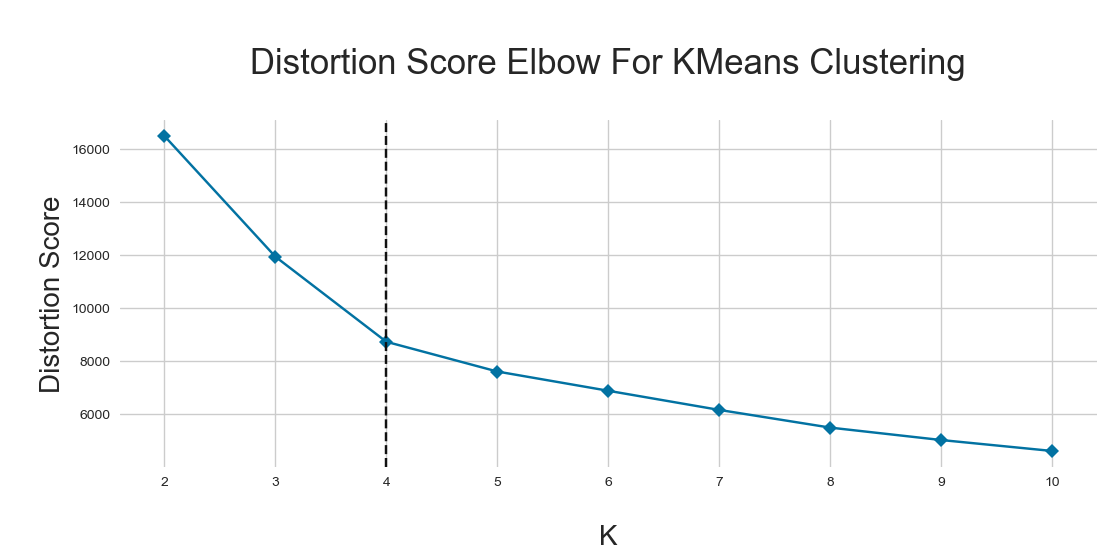

In [15]:
print("Elbow Method untuk menentukan jumlah cluster:")
_, axes = plt.subplots(figsize=(20,8))

elbow = KElbowVisualizer(KMeans(), k=10, timings=False, locate_elbow=True, size=(1260,450))
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Dari hasil diatas kita akan membentuk empat kelompok pelanggan berdasarkan data yang telah diolah sebelumnya. Proses clustering ini akan dilakukan menggunakan algoritma KMeans, yang merupakan pendekatan yang umum digunakan dalam mengelompokkan data. Dengan menerapkan Elbow Method, kita dapat mengidentifikasi titik di mana penambahan cluster tidak lagi memberikan penurunan signifikan dalam varians data. Hasilnya akan memberikan panduan yang lebih baik dalam menentukan jumlah cluster yang optimal untuk memberdayakan analisis kelompok pelanggan dengan lebih akurat.

In [16]:
km = KMeans(n_clusters = 4)

y_km = km.fit_predict(pca_data)
pca_data["Clusters"] = y_km
df["Clusters"]= y_km

Jumlah Customer per Cluster :


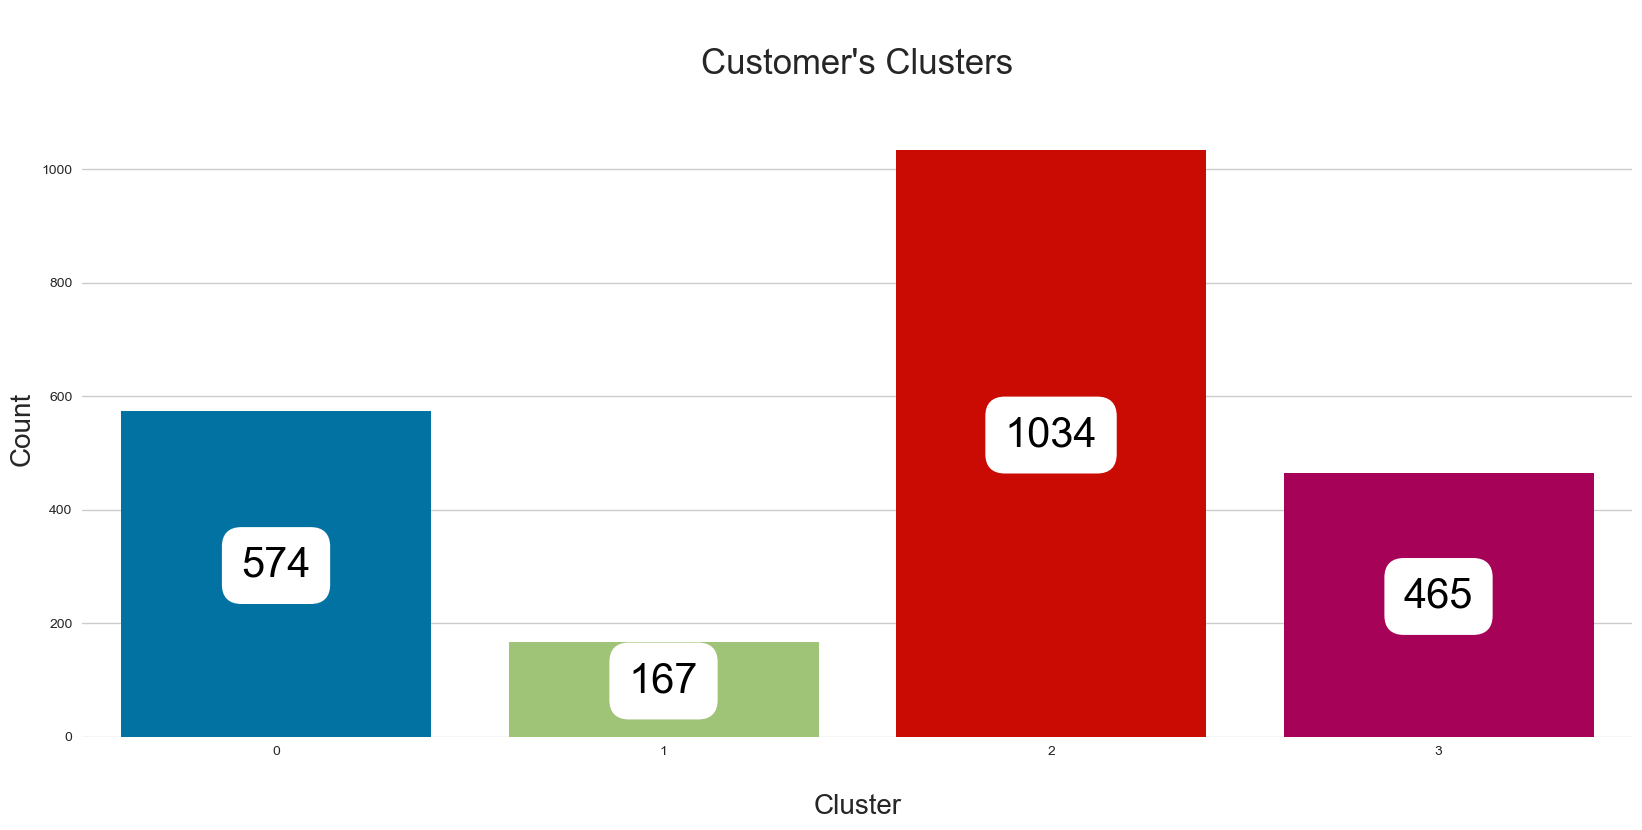

In [36]:
print("Jumlah Customer per Cluster :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Clusters"], saturation=1,linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nCluster",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "white", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Dari grafik diatas dapat disimpulkan :

* Cluster 0 berisi 574 customer
* Cluster 1 berisi 167 customer
* Cluster 2 berisi 1034 customer dan merupakan cluster dengan isi terbanyak
* Cluster 3 berisi 465 customer

In [37]:
fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, color=pca_data["Clusters"], opacity=1))])
fig.update_layout(title=dict(text= "Dataset After Clustering[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()

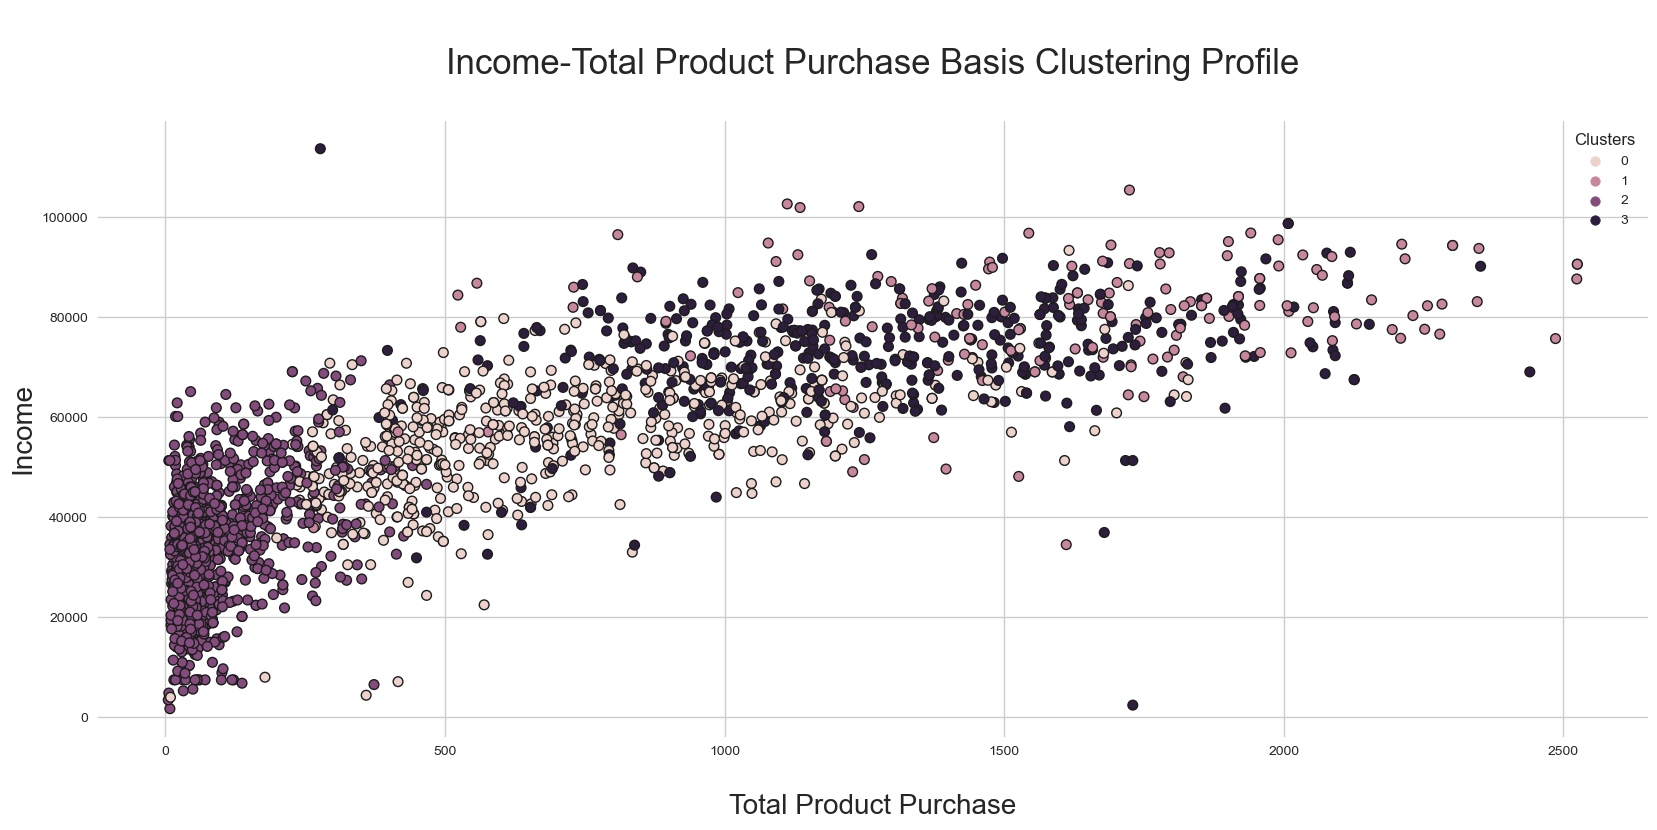

In [38]:
_, axes = plt.subplots(figsize=(20,8))
sns.scatterplot(x=df["Total_Mnt"],y=df["Income"],hue=df["Clusters"],sizes=60, alpha=1,edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome-Total Product Purchase Basis Clustering Profile\n",fontsize=25)
axes.set_ylabel("Income",fontsize=20)
axes.set_xlabel("\nTotal Product Purchase",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Dari grafik diatas dapat disimpulkan :

* Cluster 0 Memiliki Income range diantara nilai 30000 - 65000 dan Total Product Purchase diantara nilai 500 - 1000
* Cluster 1 Memiliki Income range diantara nilai 70000 - 90000 dan Total Product Purchase diantara nilai 1000 - 2250
* Cluster 2 Memiliki Income range diantara nilai 0 - 60000 dan Total Product Purchase diantara nilai 0 - 400
* Cluster 3 Memiliki Income range diantara nilai 60000 - 85000 dan Total Product Purchase diantara nilai 750 - 2000

Total Product Purchase:


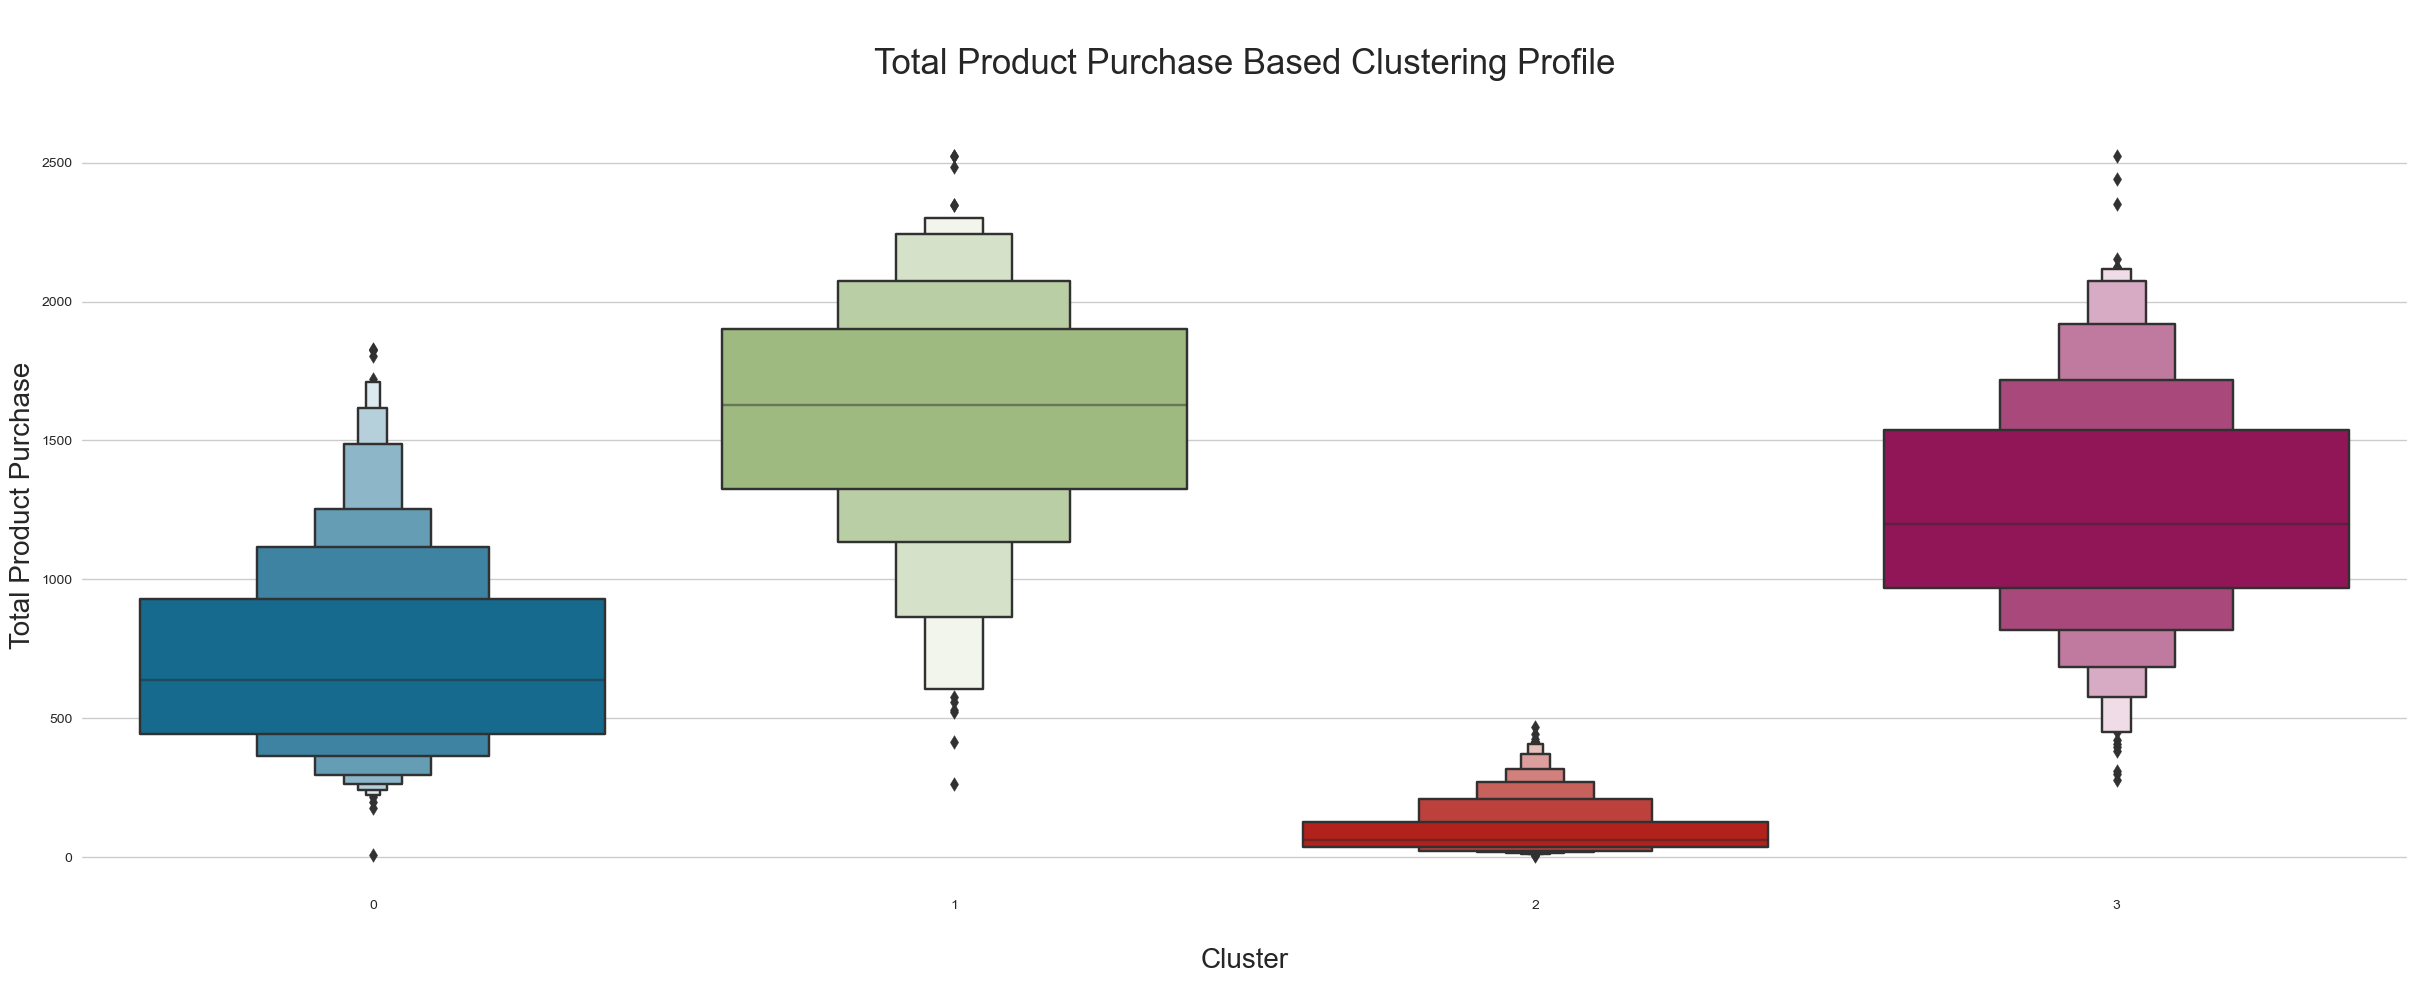

In [39]:
print(f"Total Product Purchase:")

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=df["Clusters"], y=df["Total_Mnt"])
# sns.swarmplot(x=data["Clusters"],y=data["Spent"],color="#B9C0C9",marker="o",size=10,alpha=0.6,linewidth=0,edgecolor="white")

axes.set_title("\nTotal Product Purchase Based Clustering Profile\n",fontsize=25)
axes.set_ylabel("Total Product Purchase",fontsize=20)
axes.set_xlabel("\nCluster",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Dari grafik diatas dapat disimpulkan :

* Cluster 0 Memiliki Total Product Purchase diantara nilai 500 - 1000
* Cluster 1 Memiliki Total Product Purchase diantara nilai 1000 - 2250
* Cluster 2 Memiliki Total Product Purchase diantara nilai 0 - 400
* Cluster 3 Memiliki Total Product Purchase diantara nilai 750 - 2000

Promotion Acceptance Clustering


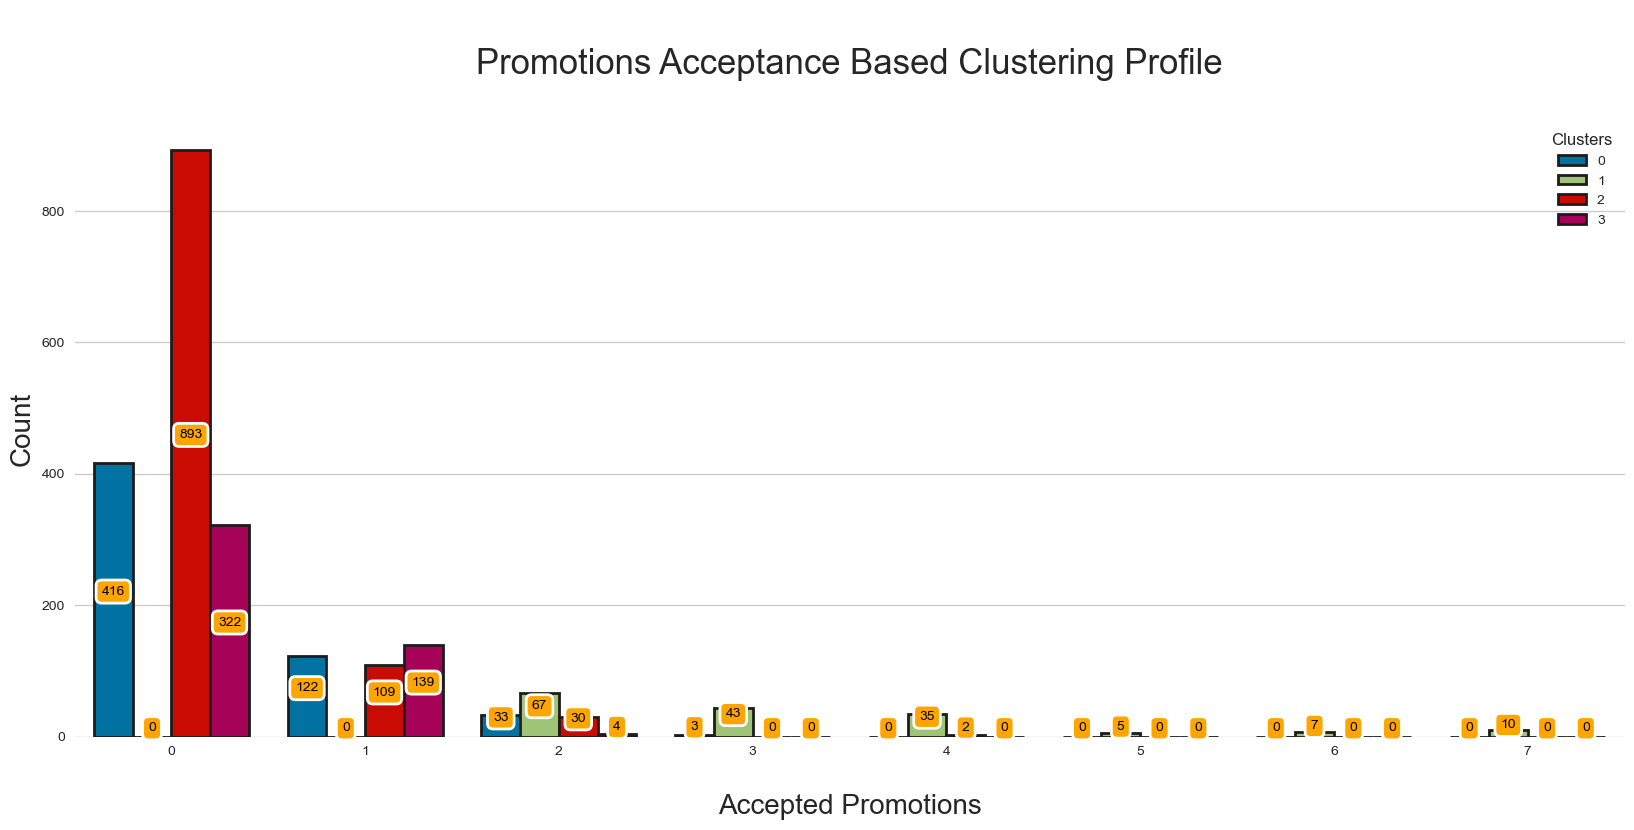

In [40]:
print(f"Promotion Acceptance Clustering")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Total_accept"],hue=df["Clusters"], saturation=1,edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_yscale("linear")
p.axes.set_title("\nPromotions Acceptance Based Clustering Profile\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nAccepted Promotions",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Dari grafik diatas dapat disimpulkan :

* 416 customer dari cluster 0, 0 customer dari cluster 1, 893 customer dari cluster2, dan 322 customer dari cluster 3 belum pernah menerima promosi
* 122 customer dari cluster 0, 0 customer dari cluster 1, 109 customer dari cluster2, dan 139 customer dari cluster 3 menerima promosi sebanyak 1 kali
* 33 customer dari cluster 0, 67 customer dari cluster 1, 30 customer dari cluster2, dan 4 customer dari cluster 3 menerima promosi sebanyak 2 kali
* 3 customer dari cluster 0, 43 customer dari cluster 1, 0 customer dari cluster2, dan 0 customer dari cluster 3 menerima promosi sebanyak 3 kali
* 0 customer dari cluster 0, 35 customer dari cluster 1, 2 customer dari cluster2, dan 0 customer dari cluster 3 menerima promosi sebanyak 4 kali
* Hanya customer dari cluster 0 yang menerima promosi sebanyak 5,6, dan 7 kali

In [41]:
def cluster(feature):
    
    _, axes = plt.subplots(figsize=(20,8))
    sns.kdeplot(x=df[feature], y=df["Total_Mnt"], hue =df["Clusters"], kind="kde",height=10)
    axes.set_title(f"\nClustering Profile On {feature}\n",fontsize=25)
    axes.set_ylabel("Total Product Purchase",fontsize=20)
    axes.set_xlabel(f"\n{feature}",fontsize=20)
    
    sns.despine(left=True, bottom=True)
    plt.show()

Characteristics of clusters based on Total Product Purchase and having childern :


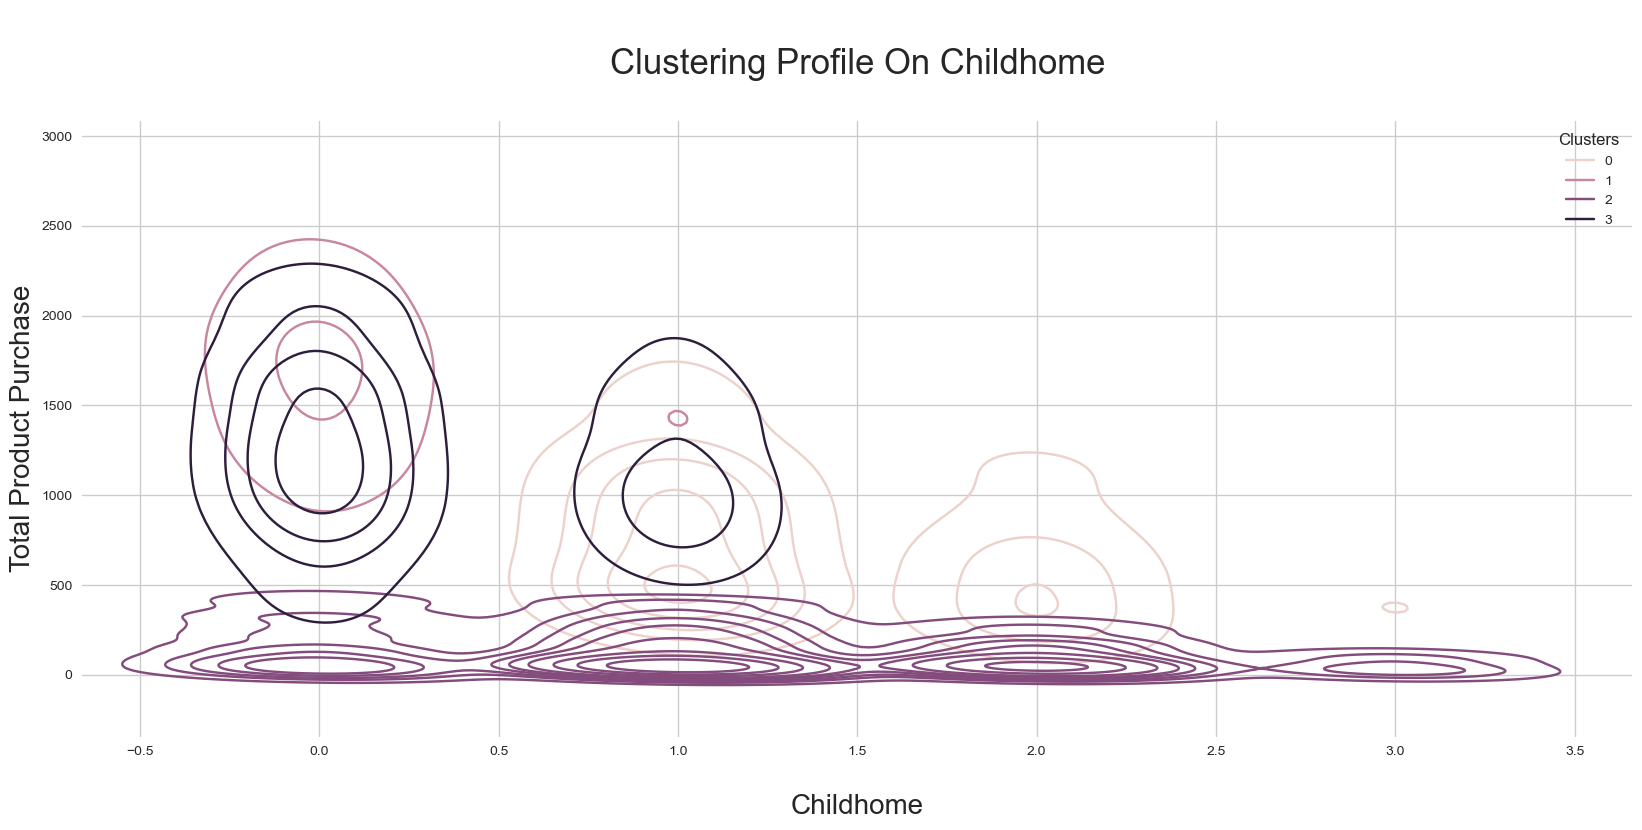

In [42]:
print(f"Characteristics of clusters based on Total Product Purchase and having childern :")
cluster("Childhome")

Dari grafik diatas dapat disimpulkan :

* Customer pada cluster 0 memiliki anak 1 atau 2 dan memiliki Total Product Purchase tertinggi diantara nilai 500 - 1000
* Customer pada cluster 1 tidak memiliki anak dan memiliki Total Product Purchase diantara nilai 1000 - 2250
* Customer pada cluster 2 cenderung beragam, tidak memiliki anak hingga memiliki 3 anak, Total Product Purchase diantara nilai 0 - 400
* Customer pada cluster 3 cenderung tidak memiliki anak dan beberapa memiliki 1 anak, serta memiliki Total Product Purchase diantara nilai 750 - 2000

Characteristics of clusters based on Total Product Purchase and age :


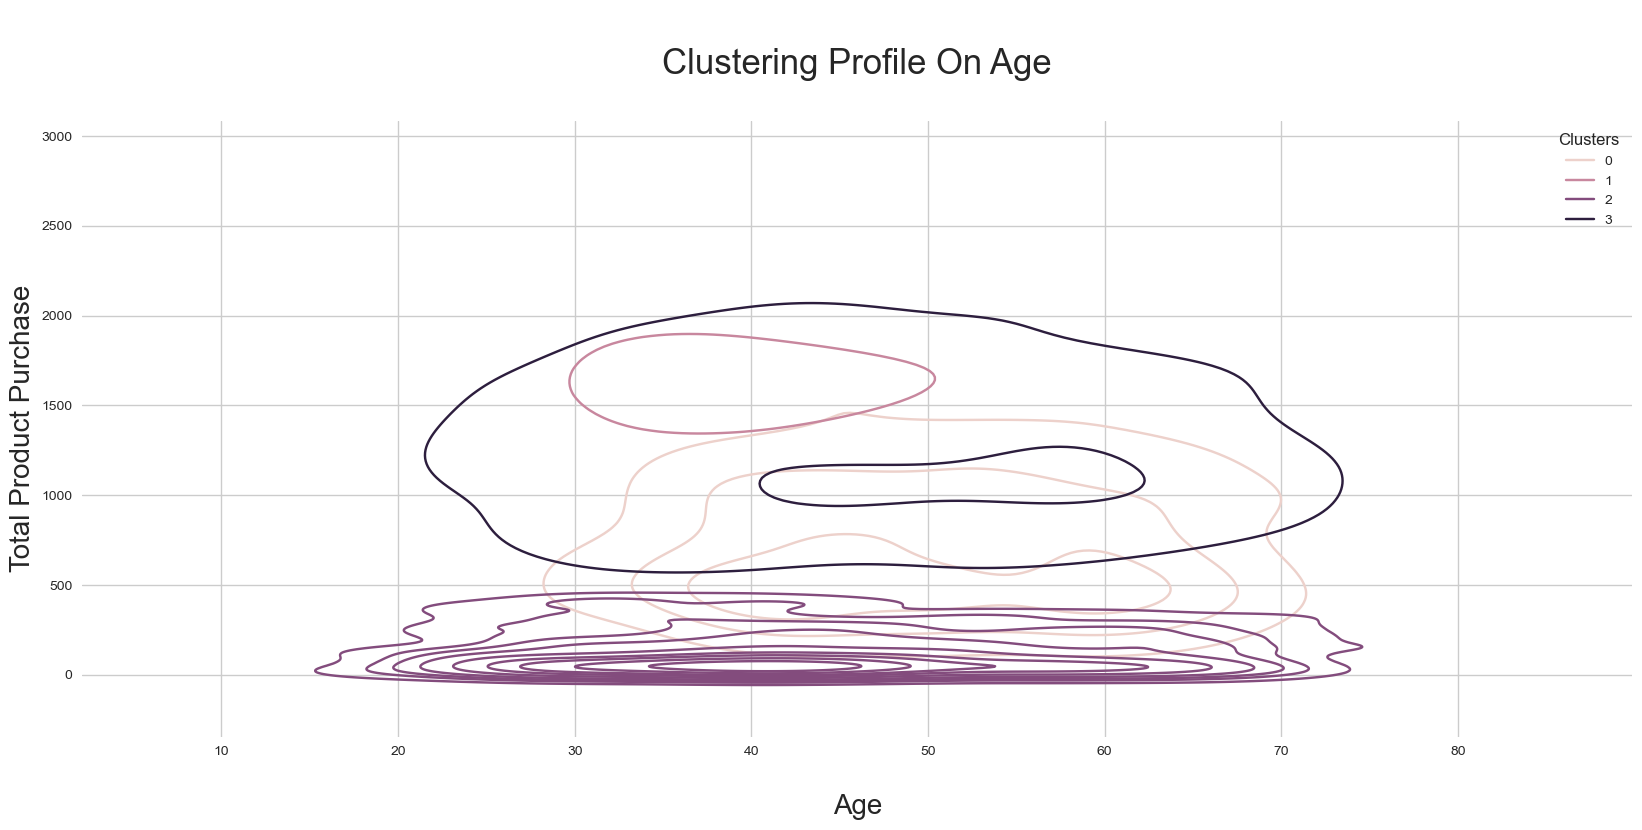

In [43]:
print(f"Characteristics of clusters based on Total Product Purchase and age :")
cluster("Age")

Dari grafik diatas dapat disimpulkan :

* Customer pada cluster 0 berumur 30 - 70 tahun dengan Total Product Purchase diantara nilai 500 - 1000
* Customer pada cluster 1 berumur 30 - 45 tahun dengan Total Product Purchase diantara nilai 1000 - 2250
* Customer pada cluster 2 berumur 25 - 70 tahun dengan Total Product Purchase diantara nilai 0 - 400
* Customer pada cluster 3 berumur 25 - 65 tahun dengan Total Product Purchase diantara nilai 750 - 2000

In [44]:
df['Education'] = df['Education'].astype(int)

Characteristics of clusters based on spending and education level :


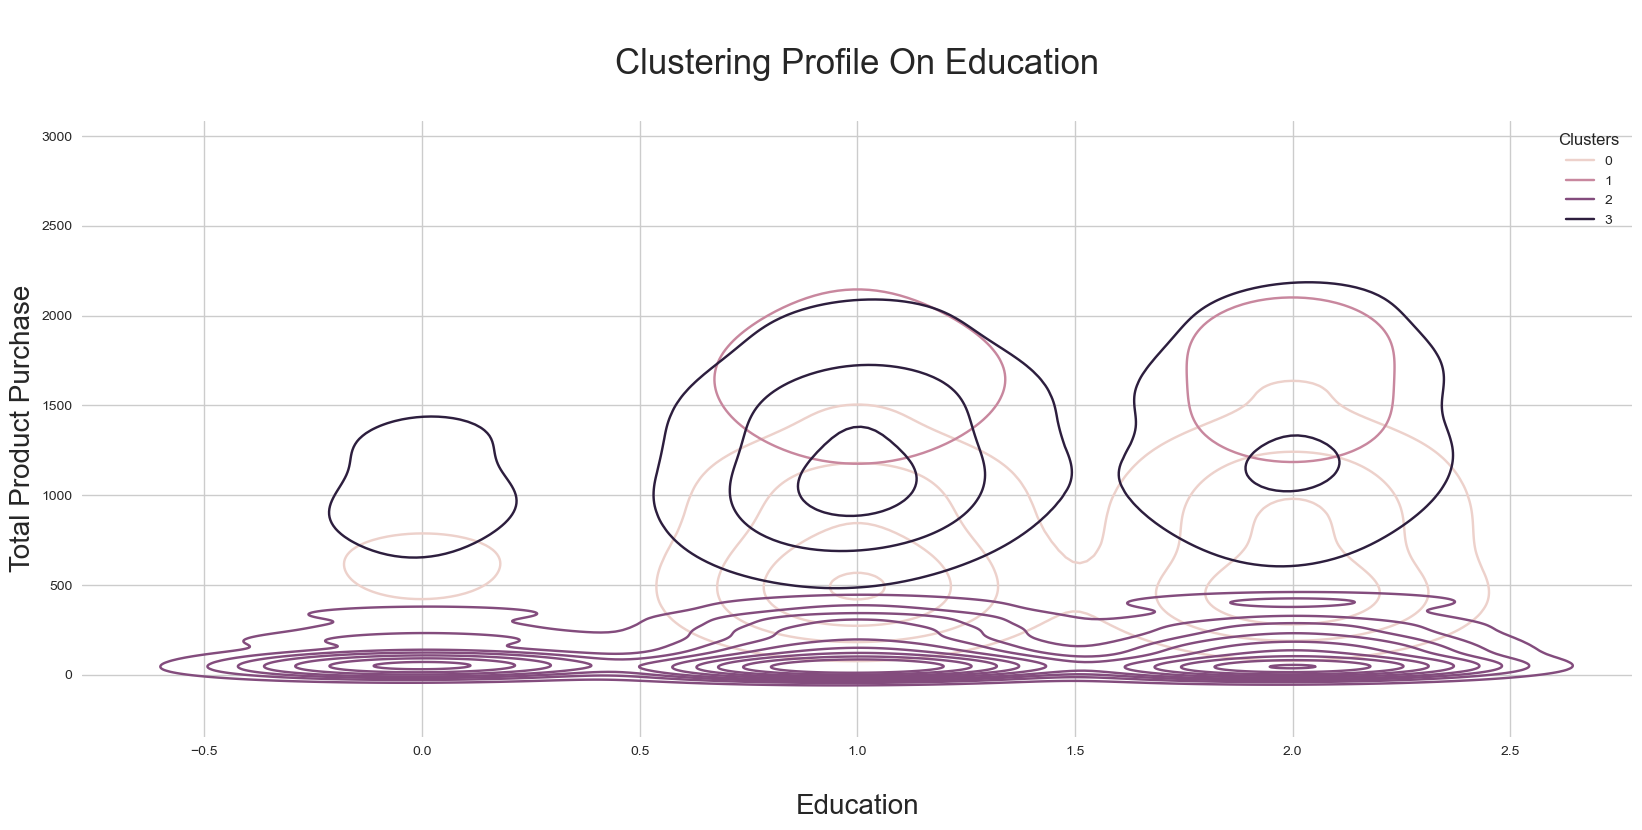

In [45]:
print(f"Characteristics of clusters based on spending and education level :")
cluster("Education")

Dari grafik diatas dapat disimpulkan :

* Customer pada cluster 0 cenderung memiliki pendidikan Graduate dan Postgraduate dan ada beberapa yang memiliki pendidikan Undergraduate dengan Total Product Purchase diantara nilai 500 - 1000
* Customer pada cluster 1 cenderung memiliki pendidikan Graduate dan Postgraduate dengan Total Product Purchase diantara nilai 1000 - 2250
* Customer pada cluster 2 cenderung memiliki pendidikan Undergraduate sampai Postgraduate dengan Total Product Purchase diantara nilai 0 - 400
* Customer pada cluster 3 pendidikan Graduate dan Postgraduate dan ada beberapa yang memiliki pendidikan Undergraduate dengan Total Product Purchase diantara nilai 750 - 2000

Characteristics of clusters based on spending and marital status :


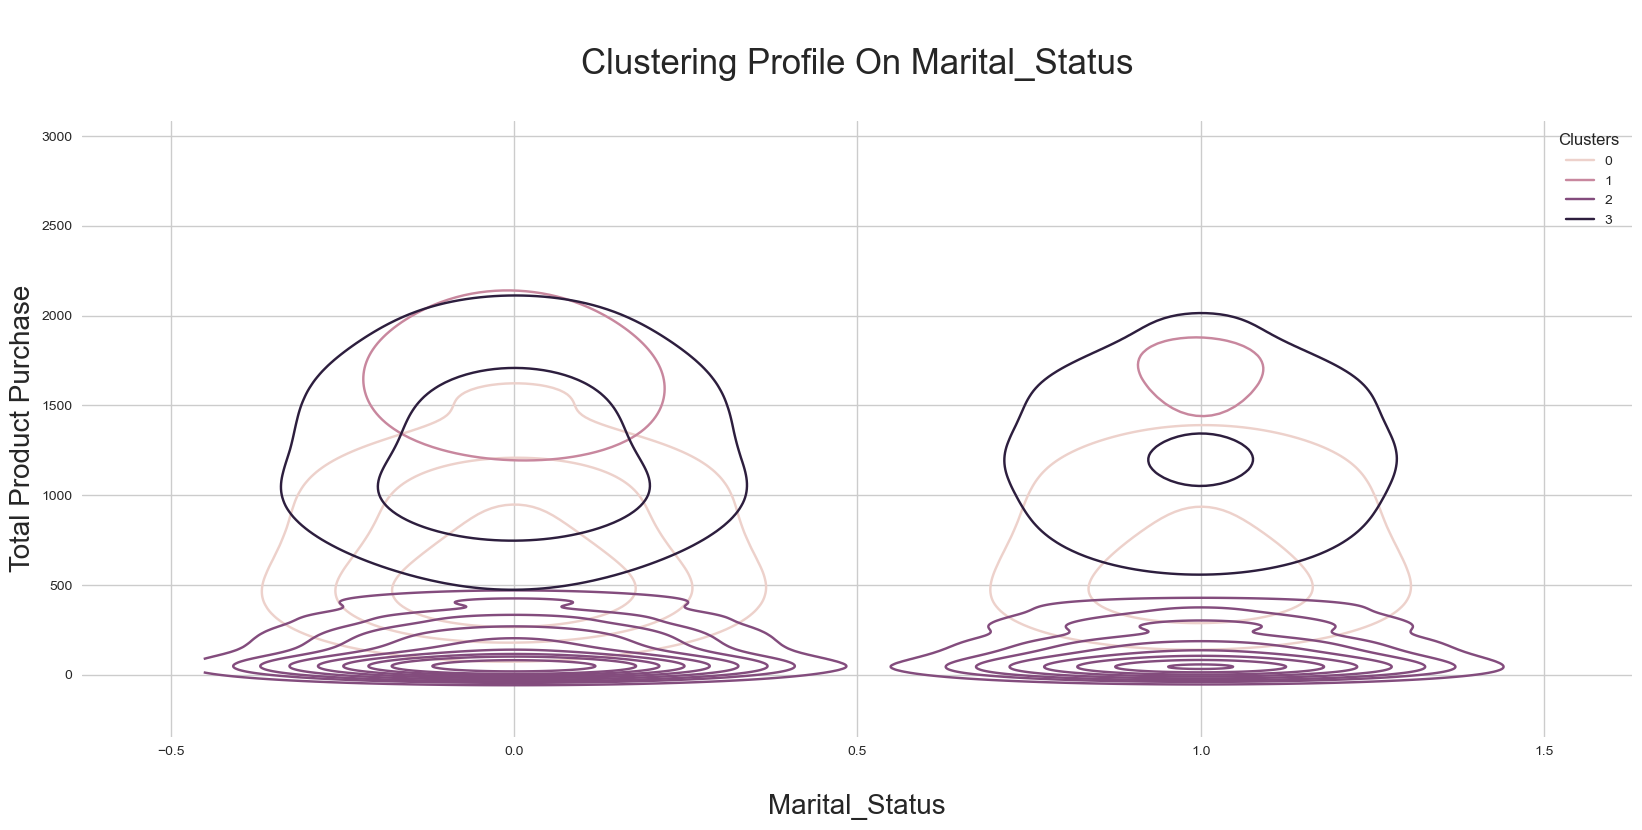

In [46]:
print(f"Characteristics of clusters based on spending and marital status :")
cluster("Marital_Status")

Dari grafik diatas dapat disimpulkan :

* Customer pada cluster 0 sebagian Married dan sebagian Single dengan Total Product Purchase diantara nilai 500 - 1000
* Customer pada cluster 1 cenderung Married dan beberapa Single dengan Total Product Purchase diantara nilai 1000 - 2250
* Customer pada cluster 2 sebagian Married dan sebagian Single dengan Total Product Purchase diantara nilai 0 - 400
* Customer pada cluster 3 cenderung Married dan beberapa Single n dengan Total Product Purchase diantara nilai 750 - 2000

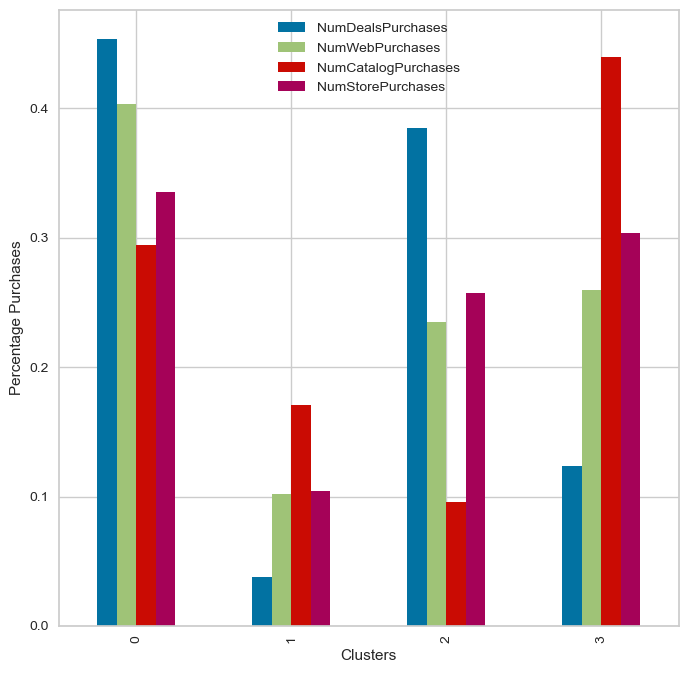

In [52]:
channel_cols = [col for col in df.columns if 'Purchases' in col] 
channels = pd.DataFrame(df[channel_cols].sum()/df.Total_num_purchase.sum(), columns=['NumberofPurchases'])

group=df.groupby('Clusters').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

Dari grafik diatas dapat disimpulkan :

* Pembelian melalui Deal terbanyak terjadi di cluster 0 dan 2
* Pembelian melalui Website terbanyak terjadi di cluster 0 dan 3
* Pembelian melalui Katalog terbanyak terjadi di cluster 3 dan 0
* Pembelian melalui Store terbanyak terjadi di cluster 0 dan 3

## Customer's Cluster Profile

### Cluster 0
* Income range: 30000 - 65000.
* Total Product Purchase: 500 - 1000.
* Menerima sedikit promosi
* Umur: 30 - 70 tahun.
* Pendidikan: Graduate dan Postgraduate, beberapa Undergraduate.
* Status Pernikahan: Sebagian Married dan sebagian Single.
* Anak: 1 atau 2.
* Pembelian melalui Deal terbanyak.
* Pembelian melalui Website terbanyak.
* Pembelian melalui Katalog terbanyak.

### Cluster 1
* Income range: 70000 - 90000.
* Total Product Purchase: 1000 - 2250.
* Menerima promosi lebih dari 1x
* Umur: 30 - 45 tahun.
* Pendidikan: Graduate dan Postgraduate.
* Status Pernikahan: Cenderung Married dan beberapa Single.
* Tidak memiliki anak.
* Pembelian melalui Deal terbanyak.
* Pembelian melalui Website terbanyak.

### Cluster 2
* Income range: 0 - 60000.
* Total Product Purchase: 0 - 400.
* Jarang Menerima Promosi
* Umur: 25 - 70 tahun.
* Pendidikan: Undergraduate sampai Postgraduate.
* Status Pernikahan: Sebagian Married dan sebagian Single.
* Beragam jumlah anak, dari tidak memiliki hingga 3 anak.
* Pembelian melalui Deal dan Website terbanyak.

### Cluster 3
* Income range: 60000 - 85000.
* Total Product Purchase: 750 - 2000.
* Sebagian menerima promosi
* Umur: 25 - 65 tahun.
* Pendidikan: Graduate dan Postgraduate, beberapa Undergraduate.
* Status Pernikahan: Cenderung Married dan beberapa Single.
* Cenderung tidak memiliki anak dan beberapa memiliki 1 anak
* Pembelian melalui Website terbanyak.
* Pembelian melalui Katalog terbanyak.

# Channel performances

Analisis *Channel Performances* bertujuan untuk memahami efisiensi berbagai saluran penjualan yang digunakan oleh suatu bisnis. Ini melibatkan penilaian terhadap kesuksesan berbagai *channel* seperti Web Purchase, Catalog Purchase, Store Purchase, atau Deals Purchase yang digunakan untuk mencapai pelanggan.

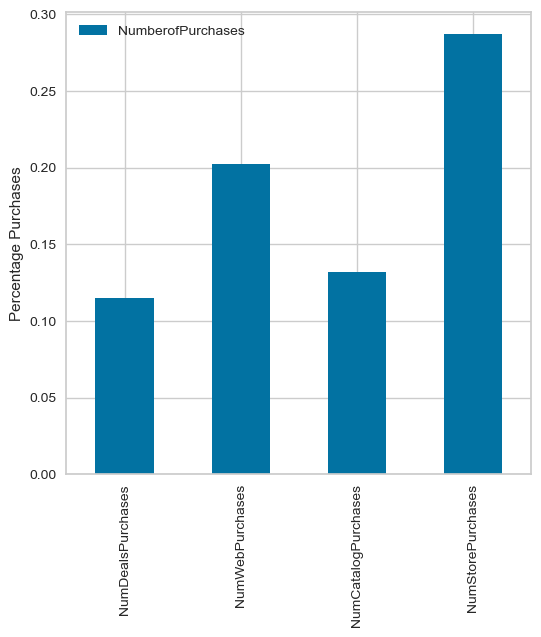

In [47]:
channel_cols = [col for col in df.columns if 'Purchases' in col] 

#making dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame(df[channel_cols].sum()/df.Total_num_purchase.sum(), columns=['NumberofPurchases'])

# plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage Purchases")
plt.show()

Dari grafik diatas dapat disimpulkan :

* Pembelian terbanyak berasal dari Store, diikuti oleh Website.
* Jumlah pembelian dengan Deal Purchase dan melalui Catalog cenderung rendah.

Bagaimana jumlah pembelian melalui setiap channel terhadap tingkat pendapatan?

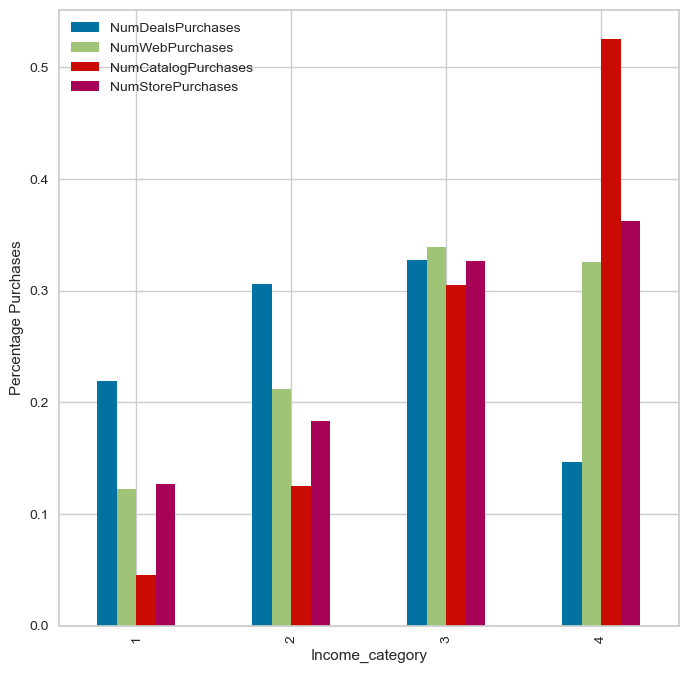

In [48]:
group=df.groupby('Income_category').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

Dari grafik diatas dapat disimpulkan:

* Persentase pembelian dengan penawaran khusus tertinggi terdapat pada kelompok pendapatan rendah dan secara progresif meningkat, namun tiba-tiba turun pada kelompok pendapatan sangat tinggi, di mana itu merupakan kategori dengan persentase terendah.

* Persentase pembelian melalui katalog sangat rendah pada kelompok pendapatan rendah, namun meningkat seiring dengan peningkatan pendapatan. Ini mencapai lebih dari 50% dari total pembelian pada kelompok pendapatan sangat tinggi.

* Persentase pembelian melalui toko dan situs web mengikuti tren yang sama di semua kelompok pendapatan, terus meningkat seiring dengan peningkatan tingkat pendapatan.

Bagaimana hubungan web visit dengan pembelian produk dari situs web?

In [49]:
correlation = df['NumWebVisitsMonth'].corr(df['NumWebPurchases'])
print(f"Hubungan antara NumWebVisitsMonth dan NumWebPurchases: {correlation}")

Hubungan antara NumWebVisitsMonth dan NumWebPurchases: -0.055846331659820746


Hubungan antara 'NumWebVisitsMonth' dan 'NumWebPurchases' adalah -0.0558. Korelasi berkisar antara -1 hingga 1, di mana nilai -1 menunjukkan hubungan linier negatif sempurna, 1 menunjukkan hubungan linier positif sempurna, dan 0 menunjukkan tidak adanya hubungan linier.

Dalam hal ini, nilai korelasi yang mendekati 0 (-0.0558) menunjukkan bahwa dua kolom tersebut memiliki hubungan linier yang sangat lemah. Artinya, jumlah kunjungan web tidak mempengaruhi jumlah pembelian produk di web. Hal ini dapat terjadi karna *customer* mungkin datang ke situs web untuk tujuan yang bukan pembelian, seperti mencari informasi, menelusuri produk, atau membandingkan harga. Oleh karena itu, tidak setiap kunjungan akan menghasilkan pembelian.

# Kesimpulan

### Best Product based on Number of Purchasing Product

* Jenis produk yang paling diminati oleh pelanggan adalah Wine, diikuti oleh Meat. Potensi peningkatan penjualan Wine dan Meat dapat dieksplorasi melalui strategi promosi yang lebih aktif, seperti cross-selling atau bundling dari masing masing kategori produk tersebut.
* Penjualan produk seperti Gold, Fish, Sweet, dan Fruits berada pada tingkat yang lebih rendah. Penjualan produk Gold, Fish, Sweet, dan Fruits mungkin rendah karena memiliki pasar yang lebih spesifik dan mungkin dianggap sebagai pilihan konsumsi kurang umum. Faktor-faktor seperti harga, gaya hidup, promosi, dan preferensi konsumen perlu dipertimbangkan dalam meningkatkan penjualan produk-produk tersebut

### Customer Segmentation
1. Pendidikan dan Penghasilan:
    * Pelanggan dengan latar belakang pendidikan Graduate, Postgraduate, dan Undergraduate cenderung memiliki penghasilan yang beragam, namun Upper Class (Graduate dan Postgraduate) menunjukkan kecenderungan memiliki penghasilan dan pembelian produk yang lebih tinggi.
    * Sebagian besar pelanggan dengan pendidikan Graduate dan Postgraduate memiliki penghasilan terbesar dalam rentang 20.000 hingga 85.000, sementara pelanggan dengan pendidikan Undergraduate memiliki penghasilan terbesar dalam rentang 10.000 hingga 80.000.
2. Jumlah Anak dan Pembelian Produk:
    * Mayoritas pelanggan memiliki satu anak, diikuti oleh mereka yang tidak memiliki anak. Pelanggan dengan anak cenderung membeli produk dalam jumlah yang lebih sedikit, namun lebih sering melakukan pembelian.
3. Korelasi Antara Pendapatan dan Pembelian Produk:
    * Terdapat korelasi positif antara pendapatan dan jumlah pembelian produk. Upper Class cenderung memiliki penghasilan dan pembelian produk lebih tinggi.
    * Korelasi yang signifikan antara pendapatan dan pembelian produk tertentu, seperti Wine, pembelian di toko, dan melalui katalog.
4. Cluster Pelanggan:
    * Pada Cluster 0, terdapat 574 pelanggan dengan karakteristik berikut. Rentang pendapatan berkisar antara 30000 hingga 65000, dan total pembelian produk berada dalam kisaran 500 hingga 1000. Pelanggan dalam cluster ini cenderung menerima sedikit promosi. Rentang usia pelanggan adalah antara 30 hingga 70 tahun, dengan mayoritas memiliki pendidikan tinggi seperti Graduate dan Postgraduate, beberapa di antaranya berpendidikan Undergraduate. Status pernikahan pelanggan di Cluster 0 sebagian besar adalah Married dan sebagian Single. Mayoritas dari mereka memiliki 1 atau 2 anak. Pembelian melalui Deal, Website, dan Katalog menjadi yang terbanyak di antara cluster lainnya.
    * Cluster 1 memiliki 167 pelanggan dengan profil sebagai berikut. Pelanggan dalam cluster ini memiliki pendapatan dalam rentang 70000 hingga 90000, dan total pembelian produk berkisar antara 1000 hingga 2250. Mereka cenderung menerima promosi lebih dari satu kali. Rentang usia pelanggan di Cluster 1 adalah antara 30 hingga 45 tahun, dan mayoritas memiliki pendidikan tinggi seperti Graduate dan Postgraduate. Status pernikahan cenderung Married dan beberapa di antaranya Single. Mayoritas dari mereka tidak memiliki anak. Pembelian melalui Deal dan Website menjadi yang terbanyak di antara pilihan pembelian mereka.
    *  Cluster 2 merupakan cluster terbesar dengan 1034 pelanggan dan memiliki karakteristik berikut. Pendapatan pelanggan berada dalam rentang 0 hingga 60000, dan total pembelian produk berkisar antara 0 hingga 400. Pelanggan dalam cluster ini jarang menerima promosi. Rentang usia pelanggan sangat bervariasi, yaitu antara 25 hingga 70 tahun, dengan tingkat pendidikan mulai dari Undergraduate hingga Postgraduate. Status pernikahan mereka sebagian besar adalah Married dan sebagian Single. Jumlah anak bervariasi, mulai dari tidak memiliki hingga 3 anak. Pembelian melalui Deal dan Website menjadi yang terbanyak di antara pilihan pembelian mereka.
    * Cluster 3 berisi 465 pelanggan dengan karakteristik sebagai berikut. Pendapatan pelanggan berada dalam rentang 60000 hingga 85000, dan total pembelian produk berkisar antara 750 hingga 2000. Sebagian dari mereka menerima promosi. Rentang usia pelanggan di Cluster 3 adalah antara 25 hingga 65 tahun, dan mayoritas memiliki pendidikan tinggi seperti Graduate dan Postgraduate, beberapa di antaranya berpendidikan Undergraduate. Status pernikahan cenderung Married dan beberapa di antaranya Single. Pembelian melalui Website dan Katalog menjadi yang terbanyak di antara pilihan pembelian mereka.
    

Dari karakteristik yang diidentifikasi, **Cluster 1 memiliki potensi menjadi loyal customer**. Pelanggan dalam Cluster 1 memiliki pendapatan yang relatif tinggi (70000 - 90000) dan melakukan pembelian produk dalam jumlah yang signifikan (1000 - 2250). Mereka juga menerima promosi lebih dari satu kali, yang dapat meningkatkan keterlibatan dan loyalitas mereka. Selain itu, mayoritas dari mereka tidak memiliki anak, yang mungkin membuat mereka lebih fleksibel dan fokus pada kepuasan pribadi dalam melakukan pembelian. 

### Channel performances

1. Preferensi Pembelian
    * Pembelian terbanyak dilakukan melalui toko fisik, diikuti oleh pembelian melalui situs web. Jumlah pembelian dengan menggunakan deal purchase dan melalui katalog cenderung rendah.
2. Pengaruh Penawaran Khusus pada Pembelian
    * Persentase pembelian dengan penawaran khusus (Deal Purchase) menunjukkan kecenderungan tertinggi pada kelompok pendapatan rendah dan secara progresif meningkat, tetapi tiba-tiba turun pada kelompok pendapatan sangat tinggi, menjadi kategori dengan persentase terendah. Ini mungkin mengindikasikan bahwa penawaran khusus lebih efektif menarik perhatian dan partisipasi pelanggan dengan pendapatan rendah hingga menengah.
3. Pembelian Melalui Katalog
    * Persentase pembelian melalui katalog sangat rendah pada kelompok pendapatan rendah, namun meningkat seiring dengan peningkatan pendapatan. Kategori ini mencapai lebih dari 50% dari total pembelian pada kelompok pendapatan sangat tinggi. Hal ini menunjukkan bahwa pembelian melalui katalog lebih diminati oleh pelanggan dengan pendapatan tinggi.
4. Pembelian Melalui Toko dan Situs Web
    * Persentase pembelian melalui toko fisik dan situs web mengikuti tren yang sama di semua kelompok pendapatan, terus meningkat seiring dengan peningkatan tingkat pendapatan. Keduanya merupakan kategori dengan persentase tertinggi pada kelompok pendapatan tinggi.
5. Korelasi antara Jumlah Kunjungan Web dan Pembelian di Web
    * Korelasi antara 'NumWebVisitsMonth' dan 'NumWebPurchases' adalah -0.0558, menunjukkan hubungan linier yang sangat lemah antara jumlah kunjungan web dan jumlah pembelian di situs web. Hal ini mengindikasikan bahwa tidak setiap kunjungan web akan menghasilkan pembelian, mungkin karena tujuan kunjungan pelanggan tidak selalu terfokus pada pembelian, melainkan untuk mencari informasi atau melihat-lihat produk.

# Rekomendasi

#### Best Product based on Number of Purchasing Product
1. Pertahankan dan fokuskan strategi promosi yang lebih aktif pada produk wine dan meat, seperti cross-selling, bundling, atau diskon untuk meningkatkan penjualan Wine dan Meat.
2. Optimalkan Penjualan Produk Gold, Fish, Sweet, dan Fruits dengan memberikan penawaran harga khusus terhadap produk-produk dengan performa lebih rendah. Tingkatkan visibilitas produk Gold, Fish, Sweet, dan Fruits melalui strategi pemasaran online dan offline.
    
#### Customer Segmentation
1. Sesuaikan promosi dan strategi pemasaran berdasarkan karakteristik masing-masing cluster, seperti menawarkan diskon eksklusif atau program loyalitas
2. Menentukan target customer baru dengan memanfaatkan profil yang teridentifikasi pada setiap cluster. Dengan memahami ciri-ciri khas setiap kelompok pelanggan, perusahaan dapat merancang strategi pemasaran yang lebih terarah dan efektif. Fokus pada pendapatan, preferensi pembelian, dan karakteristik demografis setiap cluster dapat membantu mengidentifikasi segmen pasar yang potensial dan memungkinkan perusahaan untuk menyesuaikan penawaran produkdan promosi sesuai dengan kebutuhan dan preferensi masing-masing kelompok.

#### Channel performances
1. Pertahankan fokus pada penjualan melalui toko fisik dan situs web, tetapi terus pantau tren pembelian untuk menyesuaikan strategi.
2. Perkuat promosi pembelian melalui katalog dengan menargetkan pelanggan dengan pendapatan tinggi dan menyediakan katalog yang menarik serta pertimbangkan penggunaan katalog digital untuk meningkatkan aksesibilitas dan daya tarik.
3. Kembangkan strategi pemasaran yang membedakan antara pembelian melalui toko fisik dan situs web seperti menawarkan keuntungan atau insentif yang berbeda untuk pelanggan di setiap channel pembelian.

In [31]:
# saving data to xlsx
df.to_excel(f"final_capstone2.xlsx")